In [22]:
import math
import numpy as np

In [23]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [24]:
import initdatuneq

In [25]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=0.0 #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= 0. #math.pi/6. #math.pi/6.
mass0_1=2.0
mass0_2=3.0
initdatequneq=initdatuneq.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0_1,mass0_2)
print(initdatequneq)

angle 0.0
0.0
(array([3.14159265, 0.        ]), 0.0, 50, 0.0, array([2., 3.]))


In [26]:
import getxyuvtwouneq_apper #unequal mass version

In [27]:
useperihelion=True

In [28]:
xyuvaequneq=getxyuvtwouneq_apper.getxyuvequneq(initdatequneq,useperihelion)
print(xyuvaequneq)
masses,xvec,avec=xyuvaequneq

initdat 50 [3.14159265 0.        ] 0.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
circle
r0 100.0
(array([2., 3.]), array([[-30.        ,   0.        ,   0.        ,  -0.        ,
         -0.18973666,   0.        ],
       [ 20.        ,   0.        ,   0.        ,  -0.        ,
          0.12649111,   0.        ]]), array([[ 0.0012, -0.    ,  0.    ],
       [-0.0012, -0.    ,  0.    ]]))


In [29]:
import RK4implicit

In [30]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [31]:
import OrbitDiffEqAdaptive

In [32]:
masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[2. 3.] [[-30.           0.           0.          -0.          -0.18973666
    0.        ]
 [ 20.           0.           0.          -0.           0.12649111
    0.        ]] 0.0
[2. 3.] [[-30.           0.           0.          -0.          -0.18973666
    0.        ]
 [ 20.           0.           0.          -0.           0.12649111
    0.        ]] 0.0


In [33]:
print(xyuvaequneq)

(array([2., 3.]), array([[-30.        ,   0.        ,   0.        ,  -0.        ,
         -0.18973666,   0.        ],
       [ 20.        ,   0.        ,   0.        ,  -0.        ,
          0.12649111,   0.        ]]), array([[ 0.0012, -0.    ,  0.    ],
       [-0.0012, -0.    ,  0.    ]]))


In [34]:
import timestepAdaptive

In [35]:
import parabfns

In [36]:
import hyperbfns

In [37]:
numsteps=10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaequneq,outputevery,delta)

0.01
[-1.79999997e-07  1.89736659e-03  0.00000000e+00]
[3.23999990e-14 3.59999997e-06 0.00000000e+00]
3.5999999988e-06
0.0018973665957847997
79.05694151738564 False
0.02683660114704879
[-1.61840487e-06  5.09188679e-03  0.00000000e+00]
[2.61923433e-12 2.59273111e-05 0.00000000e+00]
2.5927313738284983e-05
0.0050918870508177005
29.458626733660886 False
0.05626951157577841
[-8.1865965e-06  1.0676386e-02  0.0000000e+00]
[6.70203622e-11 1.13985217e-04 0.00000000e+00]
0.00011398528438413621
0.010676389107939829
14.049694000797313 False
0.09804656234453549
[-2.82581009e-05  1.86030055e-02  0.00000000e+00]
[7.98520268e-10 3.46071812e-04 0.00000000e+00]
0.00034607261086341714
0.01860302692744966
8.063203939067991 False
0.1486968579754782
[-7.39078354e-05  2.82131473e-02  0.00000000e+00]
[5.46236813e-09 7.95981680e-04 0.00000000e+00]
0.0007959871419174826
0.028213244087085813
5.316651978659208 False
0.20321410996743522
[-0.00015721  0.03855684  0.        ]
[2.47140321e-08 1.48663016e-03 0.0000000

1.5241579027587189 False
0.5186928258083523
[-0.03721583  0.09110705  0.        ]
[0.00138502 0.00830049 0.        ]
0.009685512225000387
0.09841500000000196
1.5241579027586953 False
0.5186928258083497
[-0.03751451  0.09098447  0.        ]
[0.00140734 0.00827817 0.        ]
0.009685512225000081
0.09841500000000042
1.5241579027587193 False
0.5186928258083492
[-0.03781278  0.09086092  0.        ]
[0.00142981 0.00825571 0.        ]
0.009685512225000201
0.09841500000000102
1.52415790275871 False
0.5186928258083479
[-0.03811064  0.09073638  0.        ]
[0.00145242 0.00823309 0.        ]
0.009685512224999923
0.09841499999999961
1.5241579027587318 False
0.5186928258083484
[-0.0384081   0.09061087  0.        ]
[0.00147518 0.00821033 0.        ]
0.009685512225000128
0.09841500000000065
1.5241579027587155 False
0.5186928258083475
[-0.03870514  0.09048439  0.        ]
[0.00149809 0.00818742 0.        ]
0.009685512225000064
0.09841500000000032
1.5241579027587209 False
0.5186928258083472
[-0.039001

1.5241579027586833 False
0.5186928258081601
[-0.06931528  0.06986347  0.        ]
[0.00480461 0.0048809  0.        ]
0.009685512225000192
0.09841500000000097
1.5241579027587107 False
0.5186928258081589
[-0.06954409  0.0696357   0.        ]
[0.00483638 0.00484913 0.        ]
0.00968551222500077
0.09841500000000392
1.5241579027586651 False
0.5186928258081538
[-0.06977216  0.06940719  0.        ]
[0.00486815 0.00481736 0.        ]
0.009685512225000237
0.09841500000000121
1.524157902758707 False
0.5186928258081521
[-0.06999947  0.06917793  0.        ]
[0.00489993 0.00478559 0.        ]
0.00968551222500047
0.09841500000000239
1.5241579027586887 False
0.5186928258081489
[-0.07022603  0.06894792  0.        ]
[0.0049317  0.00475382 0.        ]
0.00968551222499986
0.09841499999999928
1.5241579027587369 False
0.5186928258081499
[-0.07045184  0.06871718  0.        ]
[0.00496346 0.00472205 0.        ]
0.009685512225000251
0.09841500000000128
1.524157902758706 False
0.5186928258081482
[-0.07067689 

0.518692825807854
[-0.09117997  0.03703682  0.        ]
[0.00831379 0.00137173 0.        ]
0.009685512225000324
0.09841500000000165
1.5241579027587002 False
0.5186928258078519
[-0.09130097  0.0367375   0.        ]
[0.00833587 0.00134964 0.        ]
0.009685512225000156
0.0984150000000008
1.5241579027587135 False
0.5186928258078509
[-0.091421    0.03643779  0.        ]
[0.0083578  0.00132771 0.        ]
0.009685512225000404
0.09841500000000206
1.524157902758694 False
0.5186928258078483
[-0.09154004  0.03613769  0.        ]
[0.00837958 0.00130593 0.        ]
0.009685512225000362
0.09841500000000183
1.5241579027586973 False
0.5186928258078458
[-0.0916581  0.0358372  0.       ]
[0.00840121 0.0012843  0.        ]
0.009685512225000479
0.09841500000000243
1.524157902758688 False
0.5186928258078426
[-0.09177517  0.03553632  0.        ]
[0.00842268 0.00126283 0.        ]
0.00968551222500048
0.09841500000000244
1.5241579027586878 False
0.5186928258078394
[-0.09189125  0.03523506  0.        ]
[0.

0.5186928258074859
[-0.09839964 -0.00173856  0.        ]
[9.68248965e-03 3.02257820e-06 0.00000000e+00]
0.00968551222500045
0.09841500000000229
1.5241579027586902 False
0.5186928258074829
[-0.09839341 -0.00206135  0.        ]
[9.68126308e-03 4.24914978e-06 0.00000000e+00]
0.009685512225000482
0.09841500000000244
1.5241579027586878 False
0.5186928258074797
[-0.09838612 -0.00238411  0.        ]
[9.67982822e-03 5.68400266e-06 0.00000000e+00]
0.009685512225000468
0.09841500000000238
1.524157902758689 False
0.5186928258074764
[-0.09837777 -0.00270686  0.        ]
[9.67818515e-03 7.32707507e-06 0.00000000e+00]
0.009685512225000439
0.09841500000000222
1.5241579027586913 False
0.5186928258074734
[-0.09836836 -0.00302957  0.        ]
[9.67633393e-03 9.17829629e-06 0.00000000e+00]
0.009685512225000442
0.09841500000000225
1.524157902758691 False
0.5186928258074704
[-0.09835789 -0.00335225  0.        ]
[9.67427464e-03 1.12375866e-05 0.00000000e+00]
0.00968551222500048
0.09841500000000244
1.5241579

1.524157902758679 False
0.5186928258071201
[-0.09007675 -0.03964455  0.        ]
[0.00811382 0.00157169 0.        ]
0.009685512225000375
0.0984150000000019
1.5241579027586962 False
0.5186928258071176
[-0.08994622 -0.03993984  0.        ]
[0.00809032 0.00159519 0.        ]
0.009685512225000423
0.09841500000000215
1.5241579027586925 False
0.5186928258071147
[-0.08981471 -0.04023469  0.        ]
[0.00806668 0.00161883 0.        ]
0.009685512225000187
0.09841500000000095
1.524157902758711 False
0.5186928258071135
[-0.08968224 -0.04052911  0.        ]
[0.0080429  0.00164261 0.        ]
0.009685512225000288
0.09841500000000146
1.524157902758703 False
0.5186928258071116
[-0.0895488  -0.04082309  0.        ]
[0.00801899 0.00166653 0.        ]
0.009685512225000633
0.09841500000000322
1.5241579027586758 False
0.5186928258071074
[-0.0894144  -0.04111664  0.        ]
[0.00799493 0.00169058 0.        ]
0.009685512225000486
0.09841500000000247
1.5241579027586873 False
0.5186928258071041
[-0.08927903

0.5186928258068095
[-0.06774658 -0.07138567  0.        ]
[0.0045896  0.00509591 0.        ]
0.009685512225000475
0.09841500000000242
1.5241579027586882 False
0.5186928258068063
[-0.06751203 -0.07160753  0.        ]
[0.00455787 0.00512764 0.        ]
0.009685512225000387
0.09841500000000196
1.5241579027586953 False
0.5186928258068038
[-0.06727676 -0.07182861  0.        ]
[0.00452616 0.00515935 0.        ]
0.00968551222500021
0.09841500000000107
1.524157902758709 False
0.5186928258068023
[-0.06704076 -0.07204893  0.        ]
[0.00449446 0.00519105 0.        ]
0.00968551222500049
0.09841500000000249
1.5241579027586873 False
0.518692825806799
[-0.06680405 -0.07226847  0.        ]
[0.00446278 0.00522273 0.        ]
0.00968551222500001
0.09841500000000006
1.5241579027587249 False
0.518692825806799
[-0.06656661 -0.07248723  0.        ]
[0.00443111 0.0052544  0.        ]
0.009685512224999878
0.09841499999999938
1.5241579027587353 False
0.5186928258067999
[-0.06632846 -0.07270521  0.        ]
[

0.518692825806596
[-0.03367101 -0.09247581  0.        ]
[0.00113374 0.00855178 0.        ]
0.009685512225000425
0.09841500000000215
1.5241579027586925 False
0.5186928258065931
[-0.03336746 -0.09258577  0.        ]
[0.00111339 0.00857212 0.        ]
0.009685512224999991
0.09841499999999996
1.5241579027587264 False
0.5186928258065931
[-0.03306355 -0.09269473  0.        ]
[0.0010932  0.00859231 0.        ]
0.009685512225000184
0.09841500000000093
1.5241579027587113 False
0.5186928258065919
[-0.03275929 -0.0928027   0.        ]
[0.00107317 0.00861234 0.        ]
0.00968551222500025
0.09841500000000127
1.5241579027587062 False
0.5186928258065903
[-0.03245467 -0.09290967  0.        ]
[0.00105331 0.00863221 0.        ]
0.009685512224999875
0.09841499999999936
1.5241579027587355 False
0.5186928258065912
[-0.03214971 -0.09301564  0.        ]
[0.0010336  0.00865191 0.        ]
0.009685512225000128
0.09841500000000065
1.5241579027587155 False
0.5186928258065903
[-0.0318444 -0.0931206  0.       ]


1.5241579027587275 False
0.5186928258065272
[ 0.00534287 -0.09826986  0.        ]
[2.85462481e-05 9.65696598e-03 0.00000000e+00]
0.009685512224999974
0.09841499999999986
1.5241579027587278 False
0.5186928258065273
[ 0.00566521 -0.09825181  0.        ]
[3.20946497e-05 9.65341758e-03 0.00000000e+00]
0.009685512224999996
0.09841499999999997
1.5241579027587262 False
0.5186928258065273
[ 0.0059875  -0.09823269  0.        ]
[3.58501340e-05 9.64966209e-03 0.00000000e+00]
0.009685512225000026
0.09841500000000013
1.5241579027587238 False
0.5186928258065272
[ 0.00630972 -0.09821252  0.        ]
[3.98125392e-05 9.64569969e-03 0.00000000e+00]
0.00968551222499997
0.09841499999999985
1.524157902758728 False
0.5186928258065274
[ 0.00663187 -0.0981913   0.        ]
[4.39816949e-05 9.64153053e-03 0.00000000e+00]
0.009685512224999939
0.0984149999999997
1.5241579027587304 False
0.5186928258065279
[ 0.00695395 -0.09816901  0.        ]
[4.83574215e-05 9.63715480e-03 0.00000000e+00]
0.00968551222499999
0.09

0.09841499999999986
1.5241579027587278 False
0.5186928258066081
[ 0.04349859 -0.08828015  0.        ]
[0.00189213 0.00779338 0.        ]
0.009685512224999897
0.09841499999999948
1.524157902758734 False
0.5186928258066088
[ 0.04378796 -0.08813698  0.        ]
[0.00191739 0.00776813 0.        ]
0.009685512224999866
0.09841499999999932
1.5241579027587362 False
0.5186928258066097
[ 0.04407686 -0.08799286  0.        ]
[0.00194277 0.00774274 0.        ]
0.009685512224999615
0.09841499999999805
1.524157902758756 False
0.5186928258066122
[ 0.04436528 -0.08784779  0.        ]
[0.00196828 0.00771723 0.        ]
0.009685512224999911
0.09841499999999954
1.5241579027587329 False
0.5186928258066129
[ 0.04465322 -0.08770178  0.        ]
[0.00199391 0.0076916  0.        ]
0.00968551222499972
0.09841499999999859
1.5241579027587477 False
0.5186928258066148
[ 0.04494069 -0.08755482  0.        ]
[0.00201967 0.00766585 0.        ]
0.009685512224999988
0.09841499999999993
1.5241579027587269 False
0.51869282

0.5186928258068227
[ 0.074457   -0.06435579  0.        ]
[0.00554384 0.00414167 0.        ]
0.009685512224999346
0.09841499999999667
1.5241579027587773 False
0.5186928258068271
[ 0.07466772 -0.06411118  0.        ]
[0.00557527 0.00411024 0.        ]
0.009685512224999528
0.0984149999999976
1.5241579027587628 False
0.5186928258068302
[ 0.07487763 -0.06386589  0.        ]
[0.00560666 0.00407885 0.        ]
0.009685512225000099
0.0984150000000005
1.524157902758718 False
0.5186928258068295
[ 0.07508674 -0.06361991  0.        ]
[0.00563802 0.00404749 0.        ]
0.00968551222499895
0.09841499999999467
1.5241579027588081 False
0.5186928258068365
[ 0.07529504 -0.06337325  0.        ]
[0.00566934 0.00401617 0.        ]
0.009685512225000043
0.09841500000000022
1.5241579027587222 False
0.5186928258068362
[ 0.07550253 -0.0631259   0.        ]
[0.00570063 0.00398488 0.        ]
0.009685512224999915
0.09841499999999957
1.5241579027587324 False
0.5186928258068367
[ 0.07570921 -0.06287788  0.        ]

0.5186928258071473
[ 0.09384398 -0.0296449   0.        ]
[0.00880669 0.00087882 0.        ]
0.009685512224999781
0.09841499999999889
1.5241579027587429 False
0.5186928258071487
[ 0.09394072 -0.02933689  0.        ]
[0.00882486 0.00086065 0.        ]
0.009685512224999155
0.0984149999999957
1.5241579027587924 False
0.5186928258071544
[ 0.09403646 -0.02902856  0.        ]
[0.00884285 0.00084266 0.        ]
0.009685512224999514
0.09841499999999753
1.524157902758764 False
0.5186928258071577
[ 0.09413118 -0.02871992  0.        ]
[0.00886068 0.00082483 0.        ]
0.00968551222499941
0.098414999999997
1.5241579027587722 False
0.5186928258071617
[ 0.09422489 -0.02841097  0.        ]
[0.00887833 0.00080718 0.        ]
0.009685512224999731
0.09841499999999863
1.524157902758747 False
0.5186928258071636
[ 0.09431758 -0.02810171  0.        ]
[0.00889581 0.00078971 0.        ]
0.009685512224999658
0.09841499999999827
1.5241579027587526 False
0.5186928258071659
[ 0.09440926 -0.02779215  0.        ]
[

0.5186928258075159
[0.09797825 0.00926147 0.        ]
[9.59973735e-03 8.57748799e-05 0.00000000e+00]
0.009685512224999452
0.09841499999999721
1.5241579027587688 False
0.5186928258075195
[0.09794734 0.00958284 0.        ]
[9.59368140e-03 9.18308274e-05 0.00000000e+00]
0.009685512224999573
0.09841499999999784
1.5241579027587593 False
0.5186928258075224
[0.09791538 0.0099041  0.        ]
[9.58742094e-03 9.80912862e-05 0.00000000e+00]
0.00968551222499957
0.09841499999999781
1.5241579027587597 False
0.5186928258075254
[0.09788236 0.01022526 0.        ]
[0.00958096 0.00010456 0.        ]
0.009685512224999512
0.09841499999999752
1.5241579027587642 False
0.5186928258075286
[0.09784829 0.01054631 0.        ]
[0.00957429 0.00011122 0.        ]
0.009685512224999523
0.09841499999999757
1.5241579027587633 False
0.5186928258075318
[0.09781316 0.01086724 0.        ]
[0.00956742 0.0001181  0.        ]
0.009685512224999544
0.09841499999999768
1.5241579027587615 False
0.5186928258075348
[0.09777699 0.01

0.5186928258078803
[0.08631874 0.04727142 0.        ]
[0.00745092 0.00223459 0.        ]
0.00968551222499951
0.09841499999999752
1.5241579027587642 False
0.5186928258078836
[0.0861632  0.04755433 0.        ]
[0.0074241  0.00226141 0.        ]
0.009685512224999457
0.09841499999999724
1.5241579027587684 False
0.5186928258078872
[0.08600674 0.04783674 0.        ]
[0.00739716 0.00228835 0.        ]
0.00968551222499952
0.09841499999999756
1.5241579027587635 False
0.5186928258078904
[0.08584935 0.04811862 0.        ]
[0.00737011 0.0023154  0.        ]
0.009685512224999358
0.09841499999999674
1.5241579027587762 False
0.5186928258078948
[0.08569103 0.04839999 0.        ]
[0.00734295 0.00234256 0.        ]
0.00968551222499949
0.09841499999999741
1.524157902758766 False
0.5186928258078982
[0.08553179 0.04868084 0.        ]
[0.00731569 0.00236982 0.        ]
0.009685512224999698
0.09841499999999846
1.5241579027587495 False
0.5186928258079002
[0.08537164 0.04896117 0.        ]
[0.00728832 0.002397

1.5241579027587744 False
0.5186928258081802
[0.06082592 0.07736743 0.        ]
[0.00369979 0.00598572 0.        ]
0.009685512225000406
0.09841500000000206
1.524157902758694 False
0.5186928258081775
[0.06057179 0.07756655 0.        ]
[0.00366894 0.00601657 0.        ]
0.009685512224999294
0.09841499999999641
1.5241579027587813 False
0.5186928258081822
[0.06031701 0.07776484 0.        ]
[0.00363814 0.00604737 0.        ]
0.009685512224999668
0.09841499999999831
1.524157902758752 False
0.5186928258081844
[0.06006158 0.07796229 0.        ]
[0.00360739 0.00607812 0.        ]
0.009685512225000005
0.09841500000000003
1.5241579027587253 False
0.5186928258081843
[0.0598055 0.0781589 0.       ]
[0.0035767  0.00610881 0.        ]
0.009685512224999925
0.09841499999999961
1.5241579027587318 False
0.5186928258081849
[0.05954878 0.07835468 0.        ]
[0.00354606 0.00613946 0.        ]
0.00968551222499976
0.09841499999999878
1.5241579027587446 False
0.5186928258081864
[0.05929142 0.0785496  0.       

0.5186928258083517
[0.0268083  0.09469333 0.        ]
[0.00071868 0.00896683 0.        ]
0.009685512224999792
0.09841499999999895
1.524157902758742 False
0.5186928258083531
[0.02649751 0.09478077 0.        ]
[0.00070212 0.00898339 0.        ]
0.009685512225000102
0.09841500000000052
1.5241579027587178 False
0.5186928258083524
[0.02618644 0.09486718 0.        ]
[0.00068573 0.00899978 0.        ]
0.009685512224999781
0.09841499999999889
1.5241579027587429 False
0.5186928258083539
[0.02587509 0.09495258 0.        ]
[0.00066952 0.00901599 0.        ]
0.0096855122249999
0.09841499999999949
1.5241579027587338 False
0.5186928258083545
[0.02556346 0.09503695 0.        ]
[0.00065349 0.00903202 0.        ]
0.009685512224999863
0.09841499999999931
1.5241579027587364 False
0.5186928258083554
[0.02525155 0.0951203  0.        ]
[0.00063764 0.00904787 0.        ]
0.009685512224999948
0.09841499999999974
1.5241579027587298 False
0.5186928258083557
[0.02493937 0.09520263 0.        ]
[0.00062197 0.00906

0.5186928258083907
[-0.0109224   0.09780702  0.        ]
[0.0001193  0.00956621 0.        ]
0.009685512225000015
0.09841500000000007
1.5241579027587246 False
0.5186928258083907
[-0.01124319  0.09777066  0.        ]
[0.00012641 0.0095591  0.        ]
0.009685512225000031
0.09841500000000016
1.5241579027587233 False
0.5186928258083906
[-0.01156387  0.09773326  0.        ]
[0.00013372 0.00955179 0.        ]
0.009685512225000057
0.0984150000000003
1.524157902758721 False
0.5186928258083903
[-0.01188442  0.09769479  0.        ]
[0.00014124 0.00954427 0.        ]
0.00968551222499998
0.0984149999999999
1.5241579027587273 False
0.5186928258083904
[-0.01220484  0.09765528  0.        ]
[0.00014896 0.00953655 0.        ]
0.009685512225000073
0.09841500000000036
1.5241579027587202 False
0.5186928258083898
[-0.01252514  0.09761472  0.        ]
[0.00015688 0.00952863 0.        ]
0.00968551222500007
0.09841500000000035
1.5241579027587204 False
0.5186928258083894
[-0.01284529  0.0975731   0.        ]


0.5186928258082876
[-0.04732009  0.08629207  0.        ]
[0.00223919 0.00744632 0.        ]
0.009685512225000123
0.09841500000000063
1.524157902758716 False
0.5186928258082868
[-0.04760291  0.08613637  0.        ]
[0.00226604 0.00741947 0.        ]
0.009685512224999937
0.09841499999999968
1.5241579027587306 False
0.5186928258082872
[-0.04788523  0.08597975  0.        ]
[0.00229299 0.00739252 0.        ]
0.00968551222500012
0.09841500000000061
1.5241579027587162 False
0.5186928258082865
[-0.04816703  0.0858222   0.        ]
[0.00232006 0.00736545 0.        ]
0.009685512224999956
0.09841499999999978
1.524157902758729 False
0.5186928258082868
[-0.04844831  0.08566373  0.        ]
[0.00234724 0.00733827 0.        ]
0.009685512225000071
0.09841500000000036
1.5241579027587202 False
0.5186928258082864
[-0.04872906  0.08550433  0.        ]
[0.00237452 0.00731099 0.        ]
0.009685512225000388
0.09841500000000197
1.5241579027586951 False
0.5186928258082838
[-0.0490093   0.08534401  0.        

1.524157902758711 False
0.5186928258080657
[-0.07659749  0.06179269  0.        ]
[0.00586718 0.00381834 0.        ]
0.009685512225000591
0.098415000000003
1.5241579027586794 False
0.5186928258080619
[-0.07679979  0.06154108  0.        ]
[0.00589821 0.0037873  0.        ]
0.009685512225000492
0.0984150000000025
1.5241579027586871 False
0.5186928258080586
[-0.07700126  0.06128881  0.        ]
[0.00592919 0.00375632 0.        ]
0.009685512224999884
0.0984149999999994
1.5241579027587349 False
0.5186928258080594
[-0.0772019   0.06103588  0.        ]
[0.00596013 0.00372538 0.        ]
0.00968551222500013
0.09841500000000065
1.5241579027587155 False
0.5186928258080585
[-0.07740172  0.06078229  0.        ]
[0.00599103 0.00369449 0.        ]
0.009685512225000373
0.09841500000000189
1.5241579027586964 False
0.5186928258080561
[-0.0776007   0.06052805  0.        ]
[0.00602187 0.00366364 0.        ]
0.009685512225000583
0.09841500000000296
1.52415790275868 False
0.5186928258080522
[-0.07779884  0.

0.5186928258077759
[-0.09348167  0.03076833  0.        ]
[0.00873882 0.00094669 0.        ]
0.009685512225000274
0.09841500000000139
1.5241579027587042 False
0.5186928258077741
[-0.0935821  0.0304615  0.       ]
[0.00875761 0.0009279  0.        ]
0.009685512225000303
0.09841500000000154
1.5241579027587018 False
0.5186928258077721
[-0.09368152  0.03015434  0.        ]
[0.00877623 0.00090928 0.        ]
0.009685512225000232
0.09841500000000118
1.5241579027587076 False
0.5186928258077705
[-0.09377994  0.02984686  0.        ]
[0.00879468 0.00089083 0.        ]
0.00968551222500067
0.0984150000000034
1.5241579027586731 False
0.5186928258077662
[-0.09387735  0.02953905  0.        ]
[0.00881296 0.00087256 0.        ]
0.009685512225000198
0.098415000000001
1.5241579027587102 False
0.5186928258077649
[-0.09397375  0.02923093  0.        ]
[0.00883107 0.00085445 0.        ]
0.00968551222500067
0.0984150000000034
1.5241579027586731 False
0.5186928258077604
[-0.09406913  0.02892249  0.        ]
[0.0

0.09841500000000254
1.5241579027586865 False
0.5186928258074345
[-0.09827823 -0.00518672  0.        ]
[9.65861012e-03 2.69021099e-05 0.00000000e+00]
0.009685512225000463
0.09841500000000235
1.5241579027586893 False
0.5186928258074315
[-0.09826068 -0.0055091   0.        ]
[9.65516207e-03 3.03501583e-05 0.00000000e+00]
0.009685512225000453
0.0984150000000023
1.52415790275869 False
0.5186928258074285
[-0.09824208 -0.00583141  0.        ]
[9.65150686e-03 3.40053645e-05 0.00000000e+00]
0.009685512225000492
0.0984150000000025
1.5241579027586871 False
0.5186928258074253
[-0.09822242 -0.00615366  0.        ]
[9.64764465e-03 3.78675710e-05 0.00000000e+00]
0.009685512225000454
0.0984150000000023
1.52415790275869 False
0.5186928258074223
[-0.09820171 -0.00647585  0.        ]
[9.64357561e-03 4.19366117e-05 0.00000000e+00]
0.009685512225000492
0.0984150000000025
1.5241579027586871 False
0.5186928258074189
[-0.09817994 -0.00679796  0.        ]
[9.63929991e-03 4.62123113e-05 0.00000000e+00]
0.0096855

1.5241579027586567 False
0.5186928258071007
[-0.09011734 -0.03955221  0.        ]
[0.00812114 0.00156438 0.        ]
0.009685512225000352
0.09841500000000179
1.524157902758698 False
0.5186928258070984
[-0.08998711 -0.03984762  0.        ]
[0.00809768 0.00158783 0.        ]
0.009685512225000486
0.09841500000000247
1.5241579027586873 False
0.5186928258070951
[-0.0898559  -0.04014261  0.        ]
[0.00807408 0.00161143 0.        ]
0.009685512225000373
0.09841500000000189
1.5241579027586964 False
0.5186928258070926
[-0.08972373 -0.04043717  0.        ]
[0.00805035 0.00163516 0.        ]
0.009685512225000447
0.09841500000000228
1.5241579027586905 False
0.5186928258070898
[-0.08959059 -0.04073129  0.        ]
[0.00802647 0.00165904 0.        ]
0.009685512225000404
0.09841500000000206
1.524157902758694 False
0.5186928258070871
[-0.08945649 -0.04102497  0.        ]
[0.00800246 0.00168305 0.        ]
0.00968551222500009
0.09841500000000046
1.5241579027587187 False
0.5186928258070865
[-0.0893214

0.5186928258067875
[-0.06781971 -0.07131619  0.        ]
[0.00459951 0.005086   0.        ]
0.00968551222500043
0.09841500000000218
1.524157902758692 False
0.5186928258067847
[-0.06758539 -0.07153829  0.        ]
[0.00456779 0.00511773 0.        ]
0.009685512224999778
0.09841499999999886
1.5241579027587433 False
0.5186928258067861
[-0.06735035 -0.07175962  0.        ]
[0.00453607 0.00514944 0.        ]
0.009685512225000236
0.0984150000000012
1.5241579027587073 False
0.5186928258067846
[-0.06711458 -0.07198017  0.        ]
[0.00450437 0.00518115 0.        ]
0.009685512225000373
0.09841500000000189
1.5241579027586964 False
0.5186928258067821
[-0.06687809 -0.07219996  0.        ]
[0.00447268 0.00521283 0.        ]
0.009685512224999875
0.09841499999999936
1.5241579027587355 False
0.518692825806783
[-0.06664088 -0.07241896  0.        ]
[0.00444101 0.00524451 0.        ]
0.009685512225000137
0.0984150000000007
1.5241579027587149 False
0.5186928258067821
[-0.06640295 -0.07263719  0.        ]


0.09841500000000071
1.5241579027587147 False
0.5186928258065856
[-0.03497585 -0.09199023  0.        ]
[0.00122331 0.0084622  0.        ]
0.009685512225000298
0.09841500000000152
1.5241579027587022 False
0.5186928258065836
[-0.03467389 -0.09210447  0.        ]
[0.00120228 0.00848323 0.        ]
0.009685512225000196
0.098415000000001
1.5241579027587102 False
0.5186928258065823
[-0.03437155 -0.09221772  0.        ]
[0.0011814  0.00850411 0.        ]
0.009685512225000276
0.0984150000000014
1.524157902758704 False
0.5186928258065804
[-0.03406885 -0.09232998  0.        ]
[0.00116069 0.00852483 0.        ]
0.009685512225000328
0.09841500000000167
1.5241579027587 False
0.5186928258065782
[-0.03376577 -0.09244125  0.        ]
[0.00114013 0.00854538 0.        ]
0.009685512225000081
0.09841500000000042
1.5241579027587193 False
0.5186928258065776
[-0.03346234 -0.09255152  0.        ]
[0.00111973 0.00856578 0.        ]
0.009685512225000128
0.09841500000000065
1.5241579027587155 False
0.518692825806

0.09841499999999997
1.5241579027587262 False
0.5186928258065102
[ 0.00362955 -0.09834805  0.        ]
[1.31736076e-05 9.67233862e-03 0.00000000e+00]
0.009685512224999984
0.09841499999999992
1.524157902758727 False
0.5186928258065103
[ 0.00395216 -0.09833561  0.        ]
[1.56195472e-05 9.66989268e-03 0.00000000e+00]
0.009685512225000017
0.09841500000000009
1.5241579027587244 False
0.5186928258065102
[ 0.00427473 -0.09832212  0.        ]
[1.82732786e-05 9.66723895e-03 0.00000000e+00]
0.009685512225000028
0.09841500000000014
1.5241579027587235 False
0.5186928258065101
[ 0.00459725 -0.09830757  0.        ]
[2.11346876e-05 9.66437754e-03 0.00000000e+00]
0.009685512224999996
0.09841499999999997
1.5241579027587262 False
0.5186928258065102
[ 0.00491972 -0.09829196  0.        ]
[2.42036511e-05 9.66130857e-03 0.00000000e+00]
0.009685512225000005
0.09841500000000003
1.5241579027587253 False
0.5186928258065102
[ 0.00524214 -0.09827529  0.        ]
[2.74800368e-05 9.65803219e-03 0.00000000e+00]
0.

0.5186928258065824
[ 0.04107541 -0.08943335  0.        ]
[0.00168719 0.00799832 0.        ]
0.009685512224999644
0.0984149999999982
1.5241579027587537 False
0.5186928258065848
[ 0.04136857 -0.08929812  0.        ]
[0.00171136 0.00797415 0.        ]
0.009685512224999911
0.09841499999999954
1.5241579027587329 False
0.5186928258065855
[ 0.04166129 -0.08916193  0.        ]
[0.00173566 0.00794985 0.        ]
0.00968551222499978
0.09841499999999888
1.524157902758743 False
0.518692825806587
[ 0.04195356 -0.08902478  0.        ]
[0.0017601  0.00792541 0.        ]
0.009685512224999838
0.09841499999999918
1.5241579027587384 False
0.5186928258065882
[ 0.04224538 -0.08888667  0.        ]
[0.00178467 0.00790084 0.        ]
0.009685512224999929
0.09841499999999964
1.5241579027587313 False
0.5186928258065886
[ 0.04253675 -0.08874761  0.        ]
[0.00180937 0.00787614 0.        ]
0.009685512224999637
0.09841499999999816
1.5241579027587544 False
0.518692825806591
[ 0.04282765 -0.08860759  0.        ]


0.5186928258067918
[ 0.07289193 -0.06612321  0.        ]
[0.00531323 0.00437228 0.        ]
0.009685512224999929
0.09841499999999964
1.5241579027587313 False
0.5186928258067922
[ 0.07310845 -0.06588373  0.        ]
[0.00534485 0.00434067 0.        ]
0.009685512224999408
0.09841499999999699
1.5241579027587724 False
0.5186928258067962
[ 0.07332419 -0.06564355  0.        ]
[0.00537644 0.00430908 0.        ]
0.009685512224999705
0.0984149999999985
1.5241579027587489 False
0.5186928258067982
[ 0.07353914 -0.06540265  0.        ]
[0.005408   0.00427751 0.        ]
0.009685512224999757
0.09841499999999877
1.5241579027587449 False
0.5186928258067999
[ 0.0737533  -0.06516106  0.        ]
[0.00543955 0.00424596 0.        ]
0.009685512224999863
0.09841499999999931
1.5241579027587364 False
0.5186928258068008
[ 0.07396666 -0.06491876  0.        ]
[0.00547107 0.00421445 0.        ]
0.009685512224999294
0.09841499999999641
1.5241579027587813 False
0.5186928258068054
[ 0.07417923 -0.06467576  0.      

0.5186928258071007
[ 0.09278759 -0.03280208  0.        ]
[0.00860954 0.00107598 0.        ]
0.0096855122249996
0.09841499999999798
1.524157902758757 False
0.5186928258071034
[ 0.09289469 -0.03249751  0.        ]
[0.00862942 0.00105609 0.        ]
0.00968551222499947
0.09841499999999731
1.5241579027587675 False
0.518692825807107
[ 0.0930008 -0.0321926  0.       ]
[0.00864915 0.00103636 0.        ]
0.009685512224999547
0.0984149999999977
1.5241579027587613 False
0.51869282580711
[ 0.09310591 -0.03188733  0.        ]
[0.00866871 0.0010168  0.        ]
0.009685512224999537
0.09841499999999764
1.5241579027587622 False
0.5186928258071131
[ 0.09321001 -0.03158173  0.        ]
[0.00868811 0.00099741 0.        ]
0.009685512224999552
0.09841499999999773
1.524157902758761 False
0.5186928258071161
[ 0.09331312 -0.03127578  0.        ]
[0.00870734 0.00097817 0.        ]
0.009685512224999764
0.0984149999999988
1.5241579027587444 False
0.5186928258071177
[ 0.09341521 -0.0309695   0.        ]
[0.00872

1.524157902758761 False
0.5186928258074713
[0.09821542 0.00626443 0.        ]
[9.64626914e-03 3.92430855e-05 0.00000000e+00]
0.009685512224999564
0.09841499999999778
1.5241579027587602 False
0.5186928258074743
[0.09819434 0.00658659 0.        ]
[9.64212903e-03 4.33831907e-05 0.00000000e+00]
0.009685512224999483
0.09841499999999738
1.5241579027587664 False
0.5186928258074778
[0.09817221 0.00690868 0.        ]
[9.63778233e-03 4.77298925e-05 0.00000000e+00]
0.009685512224999594
0.09841499999999793
1.5241579027587577 False
0.5186928258074804
[0.09814902 0.0072307  0.        ]
[9.63322922e-03 5.22830040e-05 0.00000000e+00]
0.009685512224999568
0.09841499999999781
1.5241579027587597 False
0.5186928258074834
[0.09812477 0.00755264 0.        ]
[9.6284699e-03 5.7042329e-05 0.0000000e+00]
0.009685512224999604
0.09841499999999799
1.5241579027587568 False
0.5186928258074861
[0.09809946 0.00787449 0.        ]
[9.62350456e-03 6.20076628e-05 0.00000000e+00]
0.009685512224999436
0.09841499999999713
1.

0.5186928258078307
[0.08815716 0.04374731 0.        ]
[0.00777168 0.00191383 0.        ]
0.009685512224999493
0.09841499999999742
1.5241579027587657 False
0.5186928258078342
[0.08801317 0.04403628 0.        ]
[0.00774632 0.00193919 0.        ]
0.009685512224999755
0.09841499999999875
1.524157902758745 False
0.5186928258078358
[0.08786824 0.04432477 0.        ]
[0.00772083 0.00196468 0.        ]
0.009685512224999564
0.09841499999999778
1.5241579027587602 False
0.5186928258078388
[0.08772236 0.04461278 0.        ]
[0.00769521 0.0019903  0.        ]
0.009685512224999568
0.09841499999999781
1.5241579027587597 False
0.5186928258078418
[0.08757553 0.04490031 0.        ]
[0.00766947 0.00201604 0.        ]
0.009685512224999552
0.09841499999999773
1.524157902758761 False
0.5186928258078449
[0.08742777 0.04518736 0.        ]
[0.00764361 0.0020419  0.        ]
0.009685512224999129
0.09841499999999558
1.5241579027587944 False
0.5186928258078508
[0.08727906 0.04547393 0.        ]
[0.00761763 0.0020

0.09841499999999974
1.5241579027587298 False
0.5186928258081303
[0.06439011 0.07442732 0.        ]
[0.00414609 0.00553943 0.        ]
0.009685512224999773
0.09841499999999885
1.5241579027587435 False
0.5186928258081318
[0.06414561 0.07463815 0.        ]
[0.00411466 0.00557085 0.        ]
0.009685512224999884
0.0984149999999994
1.5241579027587349 False
0.5186928258081326
[0.06390041 0.07484818 0.        ]
[0.00408326 0.00560225 0.        ]
0.009685512224999514
0.09841499999999753
1.524157902758764 False
0.5186928258081359
[0.06365453 0.0750574  0.        ]
[0.0040519  0.00563361 0.        ]
0.009685512225000085
0.09841500000000043
1.524157902758719 False
0.5186928258081354
[0.06340796 0.07526581 0.        ]
[0.00402057 0.00566494 0.        ]
0.009685512224999832
0.09841499999999914
1.524157902758739 False
0.5186928258081366
[0.06316071 0.07547342 0.        ]
[0.00398928 0.00569624 0.        ]
0.009685512224999575
0.09841499999999784
1.5241579027587593 False
0.5186928258081395
[0.0629127

[0.03030315 0.09363349 0.        ]
[0.00091828 0.00876723 0.        ]
0.00968551222499983
0.09841499999999914
1.524157902758739 False
0.5186928258083208
[0.02999582 0.0937324  0.        ]
[0.00089975 0.00878576 0.        ]
0.009685512224999863
0.09841499999999931
1.5241579027587364 False
0.5186928258083217
[0.02968817 0.0938303  0.        ]
[0.00088139 0.00880412 0.        ]
0.009685512224999636
0.09841499999999814
1.5241579027587544 False
0.5186928258083241
[0.0293802  0.09392718 0.        ]
[0.0008632  0.00882232 0.        ]
0.009685512224999589
0.0984149999999979
1.5241579027587582 False
0.5186928258083268
[0.02907192 0.09402306 0.        ]
[0.00084518 0.00884034 0.        ]
0.009685512224999922
0.0984149999999996
1.524157902758732 False
0.5186928258083273
[0.02876332 0.09411792 0.        ]
[0.00082733 0.00885818 0.        ]
0.00968551222500011
0.09841500000000056
1.524157902758717 False
0.5186928258083267
[0.02845441 0.09421178 0.        ]
[0.00080965 0.00887586 0.        ]
0.00968

[-0.00792981  0.09809501  0.        ]
[6.28818757e-05 9.62263035e-03 0.00000000e+00]
0.00968551222500006
0.09841500000000031
1.5241579027587209 False
0.5186928258083762
[-0.00825157  0.09806847  0.        ]
[6.80883559e-05 9.61742387e-03 0.00000000e+00]
0.009685512225000026
0.09841500000000013
1.5241579027587238 False
0.518692825808376
[-0.00857324  0.09804087  0.        ]
[7.35003694e-05 9.61201186e-03 0.00000000e+00]
0.009685512225000057
0.0984150000000003
1.524157902758721 False
0.5186928258083756
[-0.00889481  0.09801222  0.        ]
[7.91176832e-05 9.60639454e-03 0.00000000e+00]
0.00968551222500004
0.0984150000000002
1.5241579027587226 False
0.5186928258083754
[-0.00921629  0.09798251  0.        ]
[8.49400554e-05 9.60057217e-03 0.00000000e+00]
0.009685512224999974
0.09841499999999986
1.5241579027587278 False
0.5186928258083756
[-0.00953767  0.09795175  0.        ]
[9.09672354e-05 9.59454499e-03 0.00000000e+00]
0.009685512225000083
0.09841500000000042
1.5241579027587193 False
0.518

0.5186928258082831
[-0.04552313  0.0872534   0.        ]
[0.00207236 0.00761316 0.        ]
0.009685512225000274
0.09841500000000139
1.5241579027587042 False
0.5186928258082814
[-0.04580912  0.0871036   0.        ]
[0.00209848 0.00758704 0.        ]
0.009685512225000005
0.09841500000000003
1.5241579027587253 False
0.5186928258082812
[-0.04609462  0.08695285  0.        ]
[0.00212471 0.0075608  0.        ]
0.009685512225000536
0.09841500000000272
1.5241579027586836 False
0.5186928258082777
[-0.04637962  0.08680117  0.        ]
[0.00215107 0.00753444 0.        ]
0.009685512225000106
0.09841500000000053
1.5241579027587175 False
0.518692825808277
[-0.04666412  0.08664856  0.        ]
[0.00217754 0.00750797 0.        ]
0.009685512225000166
0.09841500000000085
1.5241579027587127 False
0.5186928258082759
[-0.04694812  0.08649501  0.        ]
[0.00220413 0.00748139 0.        ]
0.009685512224999948
0.09841499999999974
1.5241579027587298 False
0.5186928258082762
[-0.04723161  0.08634053  0.      

0.5186928258080582
[-0.07612653  0.06237198  0.        ]
[0.00579525 0.00389026 0.        ]
0.00968551222500032
0.09841500000000163
1.5241579027587007 False
0.518692825808056
[-0.07633073  0.06212191  0.        ]
[0.00582638 0.00385913 0.        ]
0.0096855122249999
0.09841499999999949
1.5241579027587338 False
0.5186928258080566
[-0.07653411  0.06187117  0.        ]
[0.00585747 0.00382804 0.        ]
0.00968551222500031
0.09841500000000157
1.5241579027587013 False
0.5186928258080546
[-0.07673667  0.06161977  0.        ]
[0.00588852 0.003797   0.        ]
0.009685512225000435
0.09841500000000221
1.5241579027586916 False
0.5186928258080519
[-0.0769384  0.0613677  0.       ]
[0.00591952 0.00376599 0.        ]
0.009685512225000425
0.09841500000000215
1.5241579027586925 False
0.518692825808049
[-0.0771393   0.06111498  0.        ]
[0.00595047 0.00373504 0.        ]
0.009685512225001042
0.09841500000000529
1.5241579027586438 False
0.518692825808042
[-0.07733937  0.06086159  0.        ]
[0.00

1.5241579027586794 False
0.5186928258077399
[-0.09422781  0.02840128  0.        ]
[0.00887888 0.00080663 0.        ]
0.009685512225000312
0.09841500000000158
1.524157902758701 False
0.5186928258077379
[-0.09432047  0.02809202  0.        ]
[0.00889635 0.00078916 0.        ]
0.009685512225000732
0.09841500000000372
1.524157902758668 False
0.518692825807733
[-0.09441212  0.02778245  0.        ]
[0.00891365 0.00077186 0.        ]
0.009685512225000317
0.09841500000000161
1.5241579027587009 False
0.5186928258077309
[-0.09450275  0.02747258  0.        ]
[0.00893077 0.00075474 0.        ]
0.009685512225000647
0.09841500000000329
1.5241579027586747 False
0.5186928258077266
[-0.09459236  0.02716241  0.        ]
[0.00894772 0.0007378  0.        ]
0.009685512225000342
0.09841500000000174
1.524157902758699 False
0.5186928258077242
[-0.09468096  0.02685196  0.        ]
[0.00896448 0.00072103 0.        ]
0.00968551222500029
0.09841500000000147
1.5241579027587029 False
0.5186928258077222
[-0.09476854 

[0.0095672  0.00011832 0.        ]
0.009685512225000546
0.09841500000000278
1.5241579027586827 False
0.5186928258073605
[-0.09777584 -0.01119811  0.        ]
[0.00956011 0.0001254  0.        ]
0.00968551222500038
0.09841500000000193
1.5241579027586958 False
0.518692825807358
[-0.09773858 -0.0115188   0.        ]
[0.00955283 0.00013268 0.        ]
0.009685512225000425
0.09841500000000215
1.5241579027586925 False
0.5186928258073551
[-0.09770026 -0.01183937  0.        ]
[0.00954534 0.00014017 0.        ]
0.009685512225000376
0.09841500000000192
1.524157902758696 False
0.5186928258073525
[-0.0976609  -0.01215981  0.        ]
[0.00953765 0.00014786 0.        ]
0.009685512225000477
0.09841500000000242
1.5241579027586882 False
0.5186928258073494
[-0.09762048 -0.01248012  0.        ]
[0.00952976 0.00015575 0.        ]
0.009685512225000513
0.09841500000000261
1.5241579027586853 False
0.5186928258073461
[-0.09757902 -0.0128003   0.        ]
[0.00952166 0.00016385 0.        ]
0.00968551222500051


0.5186928258070055
[-0.08568606 -0.0484088   0.        ]
[0.0073421  0.00234341 0.        ]
0.009685512225000435
0.09841500000000221
1.5241579027586916 False
0.5186928258070027
[-0.08552679 -0.04868963  0.        ]
[0.00731483 0.00237068 0.        ]
0.009685512225000137
0.0984150000000007
1.5241579027587149 False
0.5186928258070018
[-0.0853666  -0.04896994  0.        ]
[0.00728746 0.00239806 0.        ]
0.009685512225000551
0.0984150000000028
1.5241579027586822 False
0.5186928258069982
[-0.0852055  -0.04924972  0.        ]
[0.00725998 0.00242554 0.        ]
0.009685512225000133
0.09841500000000068
1.524157902758715 False
0.5186928258069973
[-0.08504348 -0.04952897  0.        ]
[0.00723239 0.00245312 0.        ]
0.009685512225000581
0.09841500000000296
1.52415790275868 False
0.5186928258069934
[-0.08488054 -0.04980769  0.        ]
[0.00720471 0.00248081 0.        ]
0.00968551222500045
0.09841500000000229
1.5241579027586902 False
0.5186928258069904
[-0.08471669 -0.05008587  0.        ]
[

0.518692825806715
[-0.06030902 -0.07777104  0.        ]
[0.00363718 0.00604833 0.        ]
0.00968551222500038
0.09841500000000193
1.5241579027586958 False
0.5186928258067125
[-0.06005357 -0.07796846  0.        ]
[0.00360643 0.00607908 0.        ]
0.009685512225000754
0.09841500000000383
1.5241579027586665 False
0.5186928258067075
[-0.05979747 -0.07816505  0.        ]
[0.00357574 0.00610978 0.        ]
0.009685512225000102
0.09841500000000052
1.5241579027587178 False
0.5186928258067068
[-0.05954073 -0.07836079  0.        ]
[0.0035451  0.00614041 0.        ]
0.009685512225000107
0.09841500000000054
1.5241579027587173 False
0.5186928258067061
[-0.05928334 -0.0785557   0.        ]
[0.00351451 0.006171   0.        ]
0.00968551222500032
0.09841500000000163
1.5241579027587007 False
0.518692825806704
[-0.05902532 -0.07874975  0.        ]
[0.00348399 0.00620152 0.        ]
0.009685512225000342
0.09841500000000174
1.524157902758699 False
0.5186928258067017
[-0.05876667 -0.07894296  0.        ]


0.5186928258065328
[-0.02430442 -0.0953667   0.        ]
[0.0005907  0.00909481 0.        ]
0.009685512225000276
0.0984150000000014
1.524157902758704 False
0.518692825806531
[-0.02399144 -0.09544592  0.        ]
[0.00057559 0.00910992 0.        ]
0.009685512225000237
0.09841500000000121
1.524157902758707 False
0.5186928258065293
[-0.0236782  -0.09552411  0.        ]
[0.00056066 0.00912486 0.        ]
0.009685512224999974
0.09841499999999986
1.5241579027587278 False
0.5186928258065294
[-0.0233647  -0.09560127  0.        ]
[0.00054591 0.0091396  0.        ]
0.009685512224999948
0.09841499999999974
1.5241579027587298 False
0.5186928258065298
[-0.02305096 -0.0956774   0.        ]
[0.00053135 0.00915417 0.        ]
0.00968551222499999
0.09841499999999995
1.5241579027587266 False
0.5186928258065298
[-0.02273697 -0.09575251  0.        ]
[0.00051697 0.00916854 0.        ]
0.009685512225000177
0.0984150000000009
1.5241579027587118 False
0.5186928258065285
[-0.02242273 -0.09582658  0.        ]
[

0.5186928258064993
[ 0.01477321 -0.09729987  0.        ]
[0.00021825 0.00946726 0.        ]
0.009685512225000055
0.09841500000000028
1.5241579027587213 False
0.518692825806499
[ 0.01509232 -0.09725088  0.        ]
[0.00022778 0.00945773 0.        ]
0.00968551222499993
0.09841499999999964
1.5241579027587313 False
0.5186928258064994
[ 0.01541127 -0.09720085  0.        ]
[0.00023751 0.009448   0.        ]
0.009685512224999962
0.09841499999999981
1.5241579027587286 False
0.5186928258064997
[ 0.01573006 -0.09714977  0.        ]
[0.00024743 0.00943808 0.        ]
0.0096855122249999
0.09841499999999949
1.5241579027587338 False
0.5186928258065003
[ 0.01604867 -0.09709764  0.        ]
[0.00025756 0.00942795 0.        ]
0.009685512224999821
0.09841499999999909
1.52415790275874 False
0.5186928258065014
[ 0.01636712 -0.09704447  0.        ]
[0.00026788 0.00941763 0.        ]
0.009685512224999804
0.098414999999999
1.524157902758741 False
0.5186928258065028
[ 0.01668538 -0.09699026  0.        ]
[0.0

0.5186928258066134
[ 0.05179074 -0.08368531  0.        ]
[0.00268228 0.00700323 0.        ]
0.009685512224999398
0.09841499999999694
1.5241579027587733 False
0.5186928258066175
[ 0.05206499 -0.08351496  0.        ]
[0.00271076 0.00697475 0.        ]
0.009685512224999603
0.09841499999999798
1.524157902758757 False
0.5186928258066201
[ 0.05233868 -0.08334371  0.        ]
[0.00273934 0.00694617 0.        ]
0.009685512224999436
0.09841499999999713
1.5241579027587702 False
0.5186928258066239
[ 0.05261181 -0.08317157  0.        ]
[0.002768   0.00691751 0.        ]
0.009685512225000054
0.09841500000000027
1.5241579027587215 False
0.5186928258066236
[ 0.05288437 -0.08299853  0.        ]
[0.00279676 0.00688876 0.        ]
0.009685512225000012
0.09841500000000006
1.5241579027587249 False
0.5186928258066235
[ 0.05315636 -0.0828246   0.        ]
[0.0028256  0.00685991 0.        ]
0.009685512224999887
0.09841499999999942
1.5241579027587346 False
0.5186928258066241
[ 0.05342778 -0.08264977  0.      

1.524157902758726 False
0.5186928258068675
[ 0.08085963 -0.0561002   0.        ]
[0.00653828 0.00314723 0.        ]
0.009685512224999502
0.09841499999999746
1.524157902758765 False
0.5186928258068709
[ 0.08104323 -0.05583464  0.        ]
[0.00656801 0.00311751 0.        ]
0.009685512225000189
0.09841500000000096
1.5241579027587109 False
0.5186928258068697
[ 0.08122596 -0.05556848  0.        ]
[0.00659766 0.00308786 0.        ]
0.009685512224999504
0.09841499999999748
1.5241579027587648 False
0.518692825806873
[ 0.08140781 -0.05530172  0.        ]
[0.00662723 0.00305828 0.        ]
0.009685512224999932
0.09841499999999966
1.524157902758731 False
0.5186928258068735
[ 0.08158879 -0.05503436  0.        ]
[0.00665673 0.00302878 0.        ]
0.009685512224999793
0.09841499999999895
1.524157902758742 False
0.5186928258068749
[ 0.08176889 -0.05476641  0.        ]
[0.00668615 0.00299936 0.        ]
0.009685512224999955
0.09841499999999977
1.5241579027587293 False
0.5186928258068753
[ 0.08194812 

0.5186928258072137
[ 0.09652132 -0.01921321  0.        ]
[0.00931636 0.00036915 0.        ]
0.009685512224999726
0.0984149999999986
1.5241579027587475 False
0.5186928258072157
[ 0.09658383 -0.01889647  0.        ]
[0.00932844 0.00035708 0.        ]
0.009685512224999582
0.09841499999999788
1.5241579027587586 False
0.5186928258072185
[ 0.0966453  -0.01857953  0.        ]
[0.00934031 0.0003452  0.        ]
0.00968551222499945
0.0984149999999972
1.524157902758769 False
0.5186928258072222
[ 0.09670573 -0.01826238  0.        ]
[0.009352   0.00033351 0.        ]
0.009685512224999424
0.09841499999999707
1.524157902758771 False
0.5186928258072261
[ 0.09676512 -0.01794504  0.        ]
[0.00936349 0.00032202 0.        ]
0.00968551222499955
0.09841499999999771
1.524157902758761 False
0.5186928258072291
[ 0.09682346 -0.01762751  0.        ]
[0.00937478 0.00031073 0.        ]
0.009685512224999504
0.09841499999999748
1.5241579027587648 False
0.5186928258072325
[ 0.09688077 -0.01730978  0.        ]
[0

0.518692825807584
[0.0963796  0.01991195 0.        ]
[0.00928903 0.00039649 0.        ]
0.009685512224999698
0.09841499999999846
1.5241579027587495 False
0.518692825807586
[0.09631376 0.02022802 0.        ]
[0.00927634 0.00040917 0.        ]
0.00968551222499952
0.09841499999999756
1.5241579027587635 False
0.5186928258075894
[0.09624688 0.02054386 0.        ]
[0.00926346 0.00042205 0.        ]
0.009685512224999675
0.09841499999999835
1.5241579027587513 False
0.5186928258075916
[0.09617897 0.02085949 0.        ]
[0.00925039 0.00043512 0.        ]
0.009685512224999625
0.0984149999999981
1.524157902758755 False
0.5186928258075941
[0.09611002 0.02117489 0.        ]
[0.00923714 0.00044838 0.        ]
0.009685512224999434
0.09841499999999713
1.5241579027587702 False
0.5186928258075979
[0.09604004 0.02149007 0.        ]
[0.00922369 0.00046182 0.        ]
0.009685512224999405
0.09841499999999698
1.5241579027587726 False
0.5186928258076019
[0.09596902 0.02180501 0.        ]
[0.00921005 0.0004754

0.5186928258079231
[0.08118796 0.05562398 0.        ]
[0.00659148 0.00309403 0.        ]
0.009685512224998699
0.09841499999999338
1.5241579027588281 False
0.5186928258079319
[0.08100505 0.05589002 0.        ]
[0.00656182 0.00312369 0.        ]
0.009685512224999956
0.09841499999999978
1.524157902758729 False
0.5186928258079321
[0.08082127 0.05615546 0.        ]
[0.00653208 0.00315344 0.        ]
0.009685512224999561
0.09841499999999777
1.5241579027587604 False
0.5186928258079351
[0.08063661 0.05642029 0.        ]
[0.00650226 0.00318325 0.        ]
0.009685512225000116
0.09841500000000059
1.5241579027587167 False
0.5186928258079343
[0.08045109 0.05668451 0.        ]
[0.00647238 0.00321313 0.        ]
0.009685512224999542
0.09841499999999767
1.5241579027587617 False
0.5186928258079373
[0.08026471 0.05694813 0.        ]
[0.00644242 0.00324309 0.        ]
0.009685512224999759
0.09841499999999877
1.5241579027587449 False
0.518692825807939
[0.08007746 0.05721113 0.        ]
[0.0064124  0.0032

0.5186928258081968
[0.05255495 0.08320751 0.        ]
[0.00276202 0.00692349 0.        ]
0.00968551222499954
0.09841499999999766
1.524157902758762 False
0.5186928258081999
[0.0522817  0.08337947 0.        ]
[0.00273338 0.00695214 0.        ]
0.009685512224999407
0.09841499999999699
1.5241579027587724 False
0.5186928258082039
[0.0520079  0.08355053 0.        ]
[0.00270482 0.00698069 0.        ]
0.009685512224999616
0.09841499999999805
1.524157902758756 False
0.5186928258082065
[0.05173353 0.08372069 0.        ]
[0.00267636 0.00700915 0.        ]
0.009685512225000045
0.09841500000000022
1.5241579027587222 False
0.5186928258082062
[0.0514586  0.08388995 0.        ]
[0.00264799 0.00703752 0.        ]
0.009685512224999913
0.09841499999999956
1.5241579027587326 False
0.5186928258082067
[0.05118313 0.08405831 0.        ]
[0.00261971 0.0070658  0.        ]
0.009685512224999575
0.09841499999999784
1.5241579027587593 False
0.5186928258082096
[0.0509071  0.08422577 0.        ]
[0.00259153 0.00709

[0.0159823  0.09710859 0.        ]
[0.00025543 0.00943008 0.        ]
0.009685512225
0.098415
1.5241579027587258 False
0.5186928258083447
[0.01566365 0.0971605  0.        ]
[0.00024535 0.00944016 0.        ]
0.009685512225000048
0.09841500000000025
1.5241579027587218 False
0.5186928258083444
[0.01534483 0.09721136 0.        ]
[0.00023546 0.00945005 0.        ]
0.0096855122249998
0.09841499999999899
1.5241579027587413 False
0.5186928258083457
[0.01502585 0.09726117 0.        ]
[0.00022578 0.00945974 0.        ]
0.009685512224999889
0.09841499999999943
1.5241579027587344 False
0.5186928258083465
[0.0147067  0.09730994 0.        ]
[0.00021629 0.00946923 0.        ]
0.00968551222499996
0.0984149999999998
1.5241579027587289 False
0.5186928258083467
[0.0143874  0.09735766 0.        ]
[0.000207   0.00947851 0.        ]
0.009685512224999875
0.09841499999999936
1.5241579027587355 False
0.5186928258083476
[0.01406794 0.09740434 0.        ]
[0.00019791 0.00948761 0.        ]
0.009685512225000012


0.5186928258083418
[-0.02343004  0.09558528  0.        ]
[0.00054897 0.00913655 0.        ]
0.0096855122249999
0.09841499999999949
1.5241579027587338 False
0.5186928258083424
[-0.02374348  0.0955079   0.        ]
[0.00056375 0.00912176 0.        ]
0.009685512224999887
0.09841499999999942
1.5241579027587346 False
0.5186928258083432
[-0.02405667  0.0954295   0.        ]
[0.00057872 0.00910679 0.        ]
0.009685512225000225
0.09841500000000114
1.524157902758708 False
0.5186928258083418
[-0.02436959  0.09535007  0.        ]
[0.00059388 0.00909164 0.        ]
0.009685512225000276
0.0984150000000014
1.524157902758704 False
0.5186928258083399
[-0.02468226  0.09526961  0.        ]
[0.00060921 0.0090763  0.        ]
0.009685512225000126
0.09841500000000064
1.5241579027587158 False
0.5186928258083391
[-0.02499466  0.09518813  0.        ]
[0.00062473 0.00906078 0.        ]
0.009685512225000109
0.09841500000000056
1.524157902758717 False
0.5186928258083384
[-0.02530679  0.09510562  0.        ]
[

0.009685512225000581
0.09841500000000296
1.52415790275868 False
0.5186928258081948
[-0.05882061  0.07890278  0.        ]
[0.00345986 0.00622565 0.        ]
0.009685512224999852
0.09841499999999925
1.5241579027587373 False
0.5186928258081958
[-0.05907913  0.07870939  0.        ]
[0.00349034 0.00619517 0.        ]
0.009685512225000423
0.09841500000000215
1.5241579027586925 False
0.5186928258081929
[-0.05933702  0.07851516  0.        ]
[0.00352088 0.00616463 0.        ]
0.009685512225000146
0.09841500000000074
1.5241579027587142 False
0.5186928258081919
[-0.05959427  0.07832008  0.        ]
[0.00355148 0.00613403 0.        ]
0.009685512225000371
0.09841500000000189
1.5241579027586964 False
0.5186928258081894
[-0.05985088  0.07812416  0.        ]
[0.00358213 0.00610338 0.        ]
0.009685512225000647
0.09841500000000329
1.5241579027586747 False
0.5186928258081851
[-0.06010684  0.0779274   0.        ]
[0.00361283 0.00607268 0.        ]
0.009685512225000019
0.0984150000000001
1.524157902758

[-0.08491456  0.04974966  0.        ]
[0.00721048 0.00247503 0.        ]
0.009685512225000671
0.09841500000000342
1.524157902758673 False
0.5186928258079231
[-0.08507731  0.04947083  0.        ]
[0.00723815 0.00244736 0.        ]
0.00968551222500055
0.09841500000000279
1.5241579027586825 False
0.5186928258079194
[-0.08523914  0.04919147  0.        ]
[0.00726571 0.0024198  0.        ]
0.0096855122250003
0.09841500000000153
1.524157902758702 False
0.5186928258079173
[-0.08540006  0.04891158  0.        ]
[0.00729317 0.00239234 0.        ]
0.00968551222500045
0.09841500000000229
1.5241579027586902 False
0.5186928258079143
[-0.08556005  0.04863116  0.        ]
[0.00732052 0.00236499 0.        ]
0.009685512225000602
0.09841500000000306
1.5241579027586785 False
0.5186928258079103
[-0.08571912  0.04835022  0.        ]
[0.00734777 0.00233774 0.        ]
0.009685512225000208
0.09841500000000106
1.5241579027587093 False
0.518692825807909
[-0.08587728  0.04806876  0.        ]
[0.00737491 0.0023106

0.518692825807572
[-0.09762899  0.0124134   0.        ]
[0.00953142 0.00015409 0.        ]
0.009685512225000383
0.09841500000000195
1.5241579027586956 False
0.5186928258075695
[-0.09766919  0.01209306  0.        ]
[0.00953927 0.00014624 0.        ]
0.009685512225000505
0.09841500000000257
1.524157902758686 False
0.5186928258075661
[-0.09770833  0.01177259  0.        ]
[0.00954692 0.00013859 0.        ]
0.009685512225000463
0.09841500000000235
1.5241579027586893 False
0.5186928258075632
[-0.09774643  0.011452    0.        ]
[0.00955436 0.00013115 0.        ]
0.009685512225000465
0.09841500000000236
1.5241579027586891 False
0.5186928258075602
[-0.09778347  0.01113128  0.        ]
[0.00956161 0.00012391 0.        ]
0.009685512225000442
0.09841500000000225
1.524157902758691 False
0.5186928258075573
[-0.09781946  0.01081044  0.        ]
[0.00956865 0.00011687 0.        ]
0.009685512225000538
0.09841500000000274
1.5241579027586833 False
0.5186928258075536
[-0.0978544   0.01048948  0.        

0.5186928258071928
[-0.09466259 -0.02691667  0.        ]
[0.00896101 0.00072451 0.        ]
0.009685512225000234
0.09841500000000118
1.5241579027587076 False
0.5186928258071912
[-0.09457378 -0.02722706  0.        ]
[0.0089442  0.00074131 0.        ]
0.009685512225000789
0.09841500000000401
1.5241579027586636 False
0.518692825807186
[-0.09448395 -0.02753716  0.        ]
[0.00892722 0.0007583  0.        ]
0.00968551222499998
0.0984149999999999
1.5241579027587273 False
0.5186928258071861
[-0.09439311 -0.02784697  0.        ]
[0.00891006 0.00077545 0.        ]
0.009685512225000503
0.09841500000000256
1.5241579027586862 False
0.5186928258071827
[-0.09430125 -0.02815648  0.        ]
[0.00889273 0.00079279 0.        ]
0.009685512225000293
0.09841500000000149
1.5241579027587027 False
0.5186928258071807
[-0.09420837 -0.02846568  0.        ]
[0.00887522 0.00081029 0.        ]
0.00968551222500047
0.09841500000000239
1.5241579027586887 False
0.5186928258071776
[-0.09411448 -0.02877458  0.        ]

0.5186928258068566
[-0.07649181 -0.06192347  0.        ]
[0.005851   0.00383452 0.        ]
0.009685512225000789
0.09841500000000401
1.5241579027586636 False
0.5186928258068514
[-0.07628825 -0.06217407  0.        ]
[0.0058199  0.00386561 0.        ]
0.009685512225000619
0.09841500000000314
1.5241579027586771 False
0.5186928258068473
[-0.07608388 -0.06242399  0.        ]
[0.00578876 0.00389676 0.        ]
0.009685512225000373
0.09841500000000189
1.5241579027586964 False
0.5186928258068448
[-0.07587869 -0.06267325  0.        ]
[0.00575758 0.00392794 0.        ]
0.009685512225000126
0.09841500000000064
1.5241579027587158 False
0.518692825806844
[-0.07567268 -0.06292183  0.        ]
[0.00572636 0.00395916 0.        ]
0.009685512225000845
0.09841500000000429
1.5241579027586594 False
0.5186928258068383
[-0.07546586 -0.06316974  0.        ]
[0.0056951  0.00399042 0.        ]
0.009685512225000751
0.09841500000000382
1.5241579027586667 False
0.5186928258068332
[-0.07525823 -0.06341696  0.      

1.5241579027587107 False
0.5186928258066018
[-0.04603518 -0.08698434  0.        ]
[0.00211924 0.00756627 0.        ]
0.009685512224999904
0.09841499999999952
1.5241579027587333 False
0.5186928258066025
[-0.04574958 -0.08713489  0.        ]
[0.00209302 0.00759249 0.        ]
0.0096855122250002
0.09841500000000102
1.52415790275871 False
0.5186928258066011
[-0.04546348 -0.0872845   0.        ]
[0.00206693 0.00761858 0.        ]
0.009685512225000168
0.09841500000000085
1.5241579027587127 False
0.5186928258066
[-0.0451769  -0.08743317  0.        ]
[0.00204095 0.00764456 0.        ]
0.009685512225000444
0.09841500000000225
1.524157902758691 False
0.5186928258065971
[-0.04488984 -0.0875809   0.        ]
[0.0020151  0.00767041 0.        ]
0.009685512225000139
0.09841500000000071
1.5241579027587147 False
0.5186928258065963
[-0.04460229 -0.08772769  0.        ]
[0.00198936 0.00769615 0.        ]
0.009685512225000222
0.09841500000000113
1.5241579027587082 False
0.5186928258065947
[-0.04431426 -0.

0.09841500000000047
1.5241579027587184 False
0.5186928258064821
[-0.00818454 -0.09807408  0.        ]
[6.69866159e-05 9.61852561e-03 0.00000000e+00]
0.00968551222500008
0.0984150000000004
1.5241579027587195 False
0.5186928258064817
[-0.00786276 -0.0981004   0.        ]
[6.18229875e-05 9.62368924e-03 0.00000000e+00]
0.009685512225000022
0.09841500000000011
1.524157902758724 False
0.5186928258064815
[-0.0075409  -0.09812567  0.        ]
[5.68651620e-05 9.62864706e-03 0.00000000e+00]
0.009685512225000073
0.09841500000000036
1.5241579027587202 False
0.518692825806481
[-0.00721896 -0.09814988  0.        ]
[5.21133529e-05 9.63339887e-03 0.00000000e+00]
0.009685512225000002
0.098415
1.5241579027587258 False
0.5186928258064811
[-0.00689694 -0.09817303  0.        ]
[4.75677647e-05 9.63794446e-03 0.00000000e+00]
0.009685512225000074
0.09841500000000038
1.52415790275872 False
0.5186928258064807
[-0.00657485 -0.09819513  0.        ]
[4.32285930e-05 9.64228363e-03 0.00000000e+00]
0.0096855122250000

1.5241579027587278 False
0.5186928258065122
[ 0.03098068 -0.09341151  0.        ]
[0.0009598  0.00872571 0.        ]
0.009685512224999922
0.0984149999999996
1.524157902758732 False
0.5186928258065128
[ 0.03128695 -0.09330937  0.        ]
[0.00097887 0.00870664 0.        ]
0.009685512224999826
0.09841499999999911
1.5241579027587395 False
0.518692825806514
[ 0.03159288 -0.09320623  0.        ]
[0.00099811 0.0086874  0.        ]
0.00968551222499993
0.09841499999999964
1.5241579027587313 False
0.5186928258065144
[ 0.03189847 -0.09310209  0.        ]
[0.00101751 0.008668   0.        ]
0.009685512224999561
0.09841499999999777
1.5241579027587604 False
0.5186928258065173
[ 0.03220372 -0.09299695  0.        ]
[0.00103708 0.00864843 0.        ]
0.009685512224999897
0.09841499999999948
1.524157902758734 False
0.518692825806518
[ 0.03250862 -0.0928908   0.        ]
[0.00105681 0.0086287  0.        ]
0.00968551222499995
0.09841499999999974
1.5241579027587298 False
0.5186928258065183
[ 0.03281318 -0

0.5186928258066854
[ 0.06468464 -0.07417149  0.        ]
[0.0041841  0.00550141 0.        ]
0.009685512224999884
0.0984149999999994
1.5241579027587349 False
0.5186928258066861
[ 0.06492761 -0.07395889  0.        ]
[0.00421559 0.00546992 0.        ]
0.009685512225000324
0.09841500000000165
1.5241579027587002 False
0.518692825806684
[ 0.06516988 -0.0737455   0.        ]
[0.00424711 0.0054384  0.        ]
0.009685512224999327
0.09841499999999657
1.5241579027587788 False
0.5186928258066884
[ 0.06541145 -0.07353131  0.        ]
[0.00427866 0.00540685 0.        ]
0.009685512225000225
0.09841500000000114
1.524157902758708 False
0.518692825806687
[ 0.06565232 -0.07331634  0.        ]
[0.00431023 0.00537529 0.        ]
0.009685512224999887
0.09841499999999942
1.5241579027587346 False
0.5186928258066877
[ 0.06589248 -0.07310057  0.        ]
[0.00434182 0.00534369 0.        ]
0.009685512224999828
0.09841499999999913
1.5241579027587393 False
0.518692825806689
[ 0.06613193 -0.07288402  0.        ]


1.5241579027587693 False
0.5186928258069752
[ 0.08875269 -0.04252613  0.        ]
[0.00787704 0.00180847 0.        ]
0.009685512224999377
0.09841499999999684
1.5241579027587746 False
0.5186928258069794
[ 0.08889172 -0.04223475  0.        ]
[0.00790174 0.00178377 0.        ]
0.009685512224999662
0.09841499999999828
1.5241579027587524 False
0.5186928258069817
[ 0.0890298  -0.04194291  0.        ]
[0.0079263  0.00175921 0.        ]
0.009685512224999998
0.09841499999999999
1.524157902758726 False
0.5186928258069818
[ 0.08916691 -0.04165062  0.        ]
[0.00795074 0.00173477 0.        ]
0.009685512224999391
0.09841499999999691
1.5241579027587737 False
0.5186928258069858
[ 0.08930306 -0.04135789  0.        ]
[0.00797504 0.00171047 0.        ]
0.00968551222499965
0.09841499999999821
1.5241579027587535 False
0.5186928258069883
[ 0.08943826 -0.04106471  0.        ]
[0.0079992  0.00168631 0.        ]
0.009685512224999535
0.09841499999999764
1.5241579027587622 False
0.5186928258069914
[ 0.089572

1.524157902758761 False
0.518692825807345
[ 0.09835982 -0.00329513  0.        ]
[9.67465434e-03 1.08578858e-05 0.00000000e+00]
0.009685512224999544
0.09841499999999768
1.5241579027587615 False
0.518692825807348
[ 0.0983701  -0.00297244  0.        ]
[9.67667680e-03 8.83542293e-06 0.00000000e+00]
0.009685512224999571
0.09841499999999782
1.5241579027587595 False
0.5186928258073508
[ 0.09837932 -0.00264973  0.        ]
[9.67849118e-03 7.02104393e-06 0.00000000e+00]
0.009685512224999545
0.09841499999999768
1.5241579027587615 False
0.5186928258073538
[ 0.09838749 -0.00232698  0.        ]
[9.6800974e-03 5.4148269e-06 0.0000000e+00]
0.009685512224999533
0.09841499999999763
1.5241579027587624 False
0.5186928258073569
[ 0.09839459 -0.00200421  0.        ]
[9.68149538e-03 4.01684100e-06 0.00000000e+00]
0.009685512224999523
0.09841499999999757
1.5241579027587633 False
0.5186928258073601
[ 0.09840064 -0.00168141  0.        ]
[9.68268508e-03 2.82714639e-06 0.00000000e+00]
0.009685512224999518
0.0984

0.5186928258077115
[0.09210032 0.0346849  0.        ]
[0.00848247 0.00120304 0.        ]
0.009685512224999707
0.0984149999999985
1.5241579027587489 False
0.5186928258077135
[0.09198604 0.03498685 0.        ]
[0.00846143 0.00122408 0.        ]
0.009685512224999523
0.09841499999999757
1.5241579027587633 False
0.5186928258077167
[0.09187078 0.03528842 0.        ]
[0.00844024 0.00124527 0.        ]
0.009685512224999637
0.09841499999999816
1.5241579027587544 False
0.5186928258077191
[0.09175452 0.03558961 0.        ]
[0.00841889 0.00126662 0.        ]
0.009685512224999608
0.098414999999998
1.5241579027587566 False
0.5186928258077218
[0.09163727 0.03589042 0.        ]
[0.00839739 0.00128812 0.        ]
0.009685512224999573
0.09841499999999784
1.5241579027587593 False
0.5186928258077246
[0.09151904 0.03619085 0.        ]
[0.00837573 0.00130978 0.        ]
0.009685512224999478
0.09841499999999735
1.5241579027587668 False
0.518692825807728
[0.09139982 0.03649088 0.        ]
[0.00835393 0.001331

0.5186928258080189
[0.07241099 0.06664954 0.        ]
[0.00524335 0.00444216 0.        ]
0.009685512224999675
0.09841499999999835
1.5241579027587513 False
0.5186928258080211
[0.07219196 0.06688672 0.        ]
[0.00521168 0.00447383 0.        ]
0.009685512224999466
0.09841499999999728
1.5241579027587677 False
0.5186928258080247
[0.07197215 0.06712319 0.        ]
[0.00517999 0.00450552 0.        ]
0.009685512224999759
0.09841499999999877
1.5241579027587449 False
0.5186928258080262
[0.07175156 0.06735893 0.        ]
[0.00514829 0.00453723 0.        ]
0.009685512224999887
0.09841499999999942
1.5241579027587346 False
0.518692825808027
[0.0715302  0.06759395 0.        ]
[0.00511657 0.00456894 0.        ]
0.00968551222499955
0.09841499999999771
1.524157902758761 False
0.51869282580803
[0.07130808 0.06782824 0.        ]
[0.00508484 0.00460067 0.        ]
0.009685512224999537
0.09841499999999764
1.5241579027587622 False
0.5186928258080331
[0.07108518 0.0680618  0.        ]
[0.0050531  0.0046324

0.5186928258082494
[0.04072057 0.08959547 0.        ]
[0.00165816 0.00802735 0.        ]
0.009685512224999682
0.09841499999999839
1.5241579027587506 False
0.5186928258082515
[0.04042643 0.08972857 0.        ]
[0.0016343  0.00805122 0.        ]
0.009685512224999733
0.09841499999999864
1.5241579027587469 False
0.5186928258082533
[0.04013186 0.0898607  0.        ]
[0.00161057 0.00807495 0.        ]
0.009685512224999884
0.0984149999999994
1.5241579027587349 False
0.518692825808254
[0.03983686 0.08999187 0.        ]
[0.00158698 0.00809854 0.        ]
0.009685512224999686
0.0984149999999984
1.5241579027587504 False
0.5186928258082562
[0.03954143 0.09012207 0.        ]
[0.00156352 0.00812199 0.        ]
0.009685512224999861
0.0984149999999993
1.5241579027587366 False
0.5186928258082572
[0.03924557 0.0902513  0.        ]
[0.00154021 0.0081453  0.        ]
0.009685512224999953
0.09841499999999977
1.5241579027587293 False
0.5186928258082575
[0.03894929 0.09037956 0.        ]
[0.00151705 0.008168

0.5186928258083442
[0.00291697 0.09837176 0.        ]
[8.50874163e-06 9.67700348e-03 0.00000000e+00]
0.009685512224999976
0.09841499999999988
1.5241579027587275 False
0.5186928258083443
[0.00259425 0.0983808  0.        ]
[6.73013781e-06 9.67878209e-03 0.00000000e+00]
0.009685512224999936
0.09841499999999967
1.5241579027587309 False
0.5186928258083447
[0.0022715  0.09838878 0.        ]
[5.15970848e-06 9.68035252e-03 0.00000000e+00]
0.009685512224999982
0.0984149999999999
1.5241579027587273 False
0.5186928258083449
[0.00194872 0.0983957  0.        ]
[3.79752126e-06 9.68171470e-03 0.00000000e+00]
0.009685512224999974
0.09841499999999986
1.5241579027587278 False
0.518692825808345
[0.00162593 0.09840157 0.        ]
[2.64363477e-06 9.68286859e-03 0.00000000e+00]
0.009685512224999977
0.09841499999999989
1.5241579027587275 False
0.5186928258083451
[0.00130311 0.09840637 0.        ]
[1.69809870e-06 9.68381413e-03 0.00000000e+00]
0.00968551222499999
0.09841499999999995
1.5241579027587266 False
0

1.5241579027586984 False
0.5186928258082921
[-0.03594209  0.09161702  0.        ]
[0.00129183 0.00839368 0.        ]
0.009685512225
0.098415
1.5241579027587258 False
0.5186928258082921
[-0.03624245  0.09149862  0.        ]
[0.00131351 0.008372   0.        ]
0.009685512225
0.098415
1.5241579027587258 False
0.5186928258082921
[-0.03654241  0.09137923  0.        ]
[0.00133535 0.00835016 0.        ]
0.009685512225000173
0.09841500000000088
1.5241579027587122 False
0.518692825808291
[-0.03684198  0.09125886  0.        ]
[0.00135733 0.00832818 0.        ]
0.00968551222500026
0.09841500000000132
1.5241579027587053 False
0.5186928258082892
[-0.03714116  0.09113751  0.        ]
[0.00137947 0.00830605 0.        ]
0.009685512225000432
0.0984150000000022
1.5241579027586918 False
0.5186928258082864
[-0.03743994  0.09101518  0.        ]
[0.00140175 0.00828376 0.        ]
0.009685512225000015
0.09841500000000007
1.5241579027587246 False
0.5186928258082862
[-0.03773831  0.09089187  0.        ]
[0.0014

0.5186928258080971
[-0.06879777  0.07037314  0.        ]
[0.00473313 0.00495238 0.        ]
0.009685512224999996
0.09841499999999997
1.5241579027587262 False
0.5186928258080971
[-0.06902826  0.07014707  0.        ]
[0.0047649  0.00492061 0.        ]
0.009685512225000241
0.09841500000000122
1.5241579027587069 False
0.5186928258080954
[-0.06925801  0.06992025  0.        ]
[0.00479667 0.00488884 0.        ]
0.009685512225000643
0.09841500000000326
1.5241579027586751 False
0.5186928258080911
[-0.06948701  0.06969267  0.        ]
[0.00482844 0.00485707 0.        ]
0.009685512225000838
0.09841500000000425
1.52415790275866 False
0.5186928258080855
[-0.06971526  0.06946434  0.        ]
[0.00486022 0.00482529 0.        ]
0.009685512224999946
0.09841499999999972
1.52415790275873 False
0.518692825808086
[-0.06994276  0.06923527  0.        ]
[0.00489199 0.00479352 0.        ]
0.009685512225000015
0.09841500000000007
1.5241579027587246 False
0.518692825808086
[-0.07016951  0.06900545  0.        ]
[

0.0984150000000014
1.524157902758704 False
0.5186928258077914
[-0.09102735  0.03741034  0.        ]
[0.00828598 0.00139953 0.        ]
0.009685512225000201
0.09841500000000102
1.52415790275871 False
0.5186928258077902
[-0.09114959  0.03711152  0.        ]
[0.00830825 0.00137727 0.        ]
0.009685512225000501
0.09841500000000254
1.5241579027586865 False
0.5186928258077869
[-0.09127084  0.03681231  0.        ]
[0.00833037 0.00135515 0.        ]
0.009685512225000697
0.09841500000000354
1.524157902758671 False
0.5186928258077822
[-0.09139111  0.0365127   0.        ]
[0.00835234 0.00133318 0.        ]
0.009685512225000307
0.09841500000000156
1.5241579027587016 False
0.5186928258077802
[-0.0915104   0.03621269  0.        ]
[0.00837415 0.00131136 0.        ]
0.009685512225000406
0.09841500000000206
1.524157902758694 False
0.5186928258077775
[-0.0916287  0.0359123  0.       ]
[0.00839582 0.00128969 0.        ]
0.009685512225000614
0.09841500000000312
1.5241579027586774 False
0.51869282580777

0.5186928258074232
[-0.09840594 -0.00133511  0.        ]
[9.68372971e-03 1.78251407e-06 0.00000000e+00]
0.009685512225000461
0.09841500000000235
1.5241579027586893 False
0.51869282580742
[-0.09840103 -0.00165792  0.        ]
[9.68276352e-03 2.74870317e-06 0.00000000e+00]
0.00968551222500047
0.09841500000000239
1.5241579027586887 False
0.5186928258074168
[-0.09839507 -0.00198072  0.        ]
[9.68158899e-03 3.92323816e-06 0.00000000e+00]
0.009685512225000463
0.09841500000000235
1.5241579027586893 False
0.5186928258074137
[-0.09838804 -0.00230349  0.        ]
[9.68020616e-03 5.30606847e-06 0.00000000e+00]
0.009685512225000475
0.09841500000000242
1.5241579027586882 False
0.5186928258074105
[-0.09837995 -0.00262624  0.        ]
[9.67861509e-03 6.89713459e-06 0.00000000e+00]
0.009685512225000463
0.09841500000000235
1.5241579027586893 False
0.5186928258074075
[-0.09837081 -0.00294896  0.        ]
[9.67681586e-03 8.69636803e-06 0.00000000e+00]
0.009685512225000468
0.09841500000000238
1.524157

0.5186928258070553
[-0.09010921 -0.03957073  0.        ]
[0.00811967 0.00156584 0.        ]
0.00968551222500067
0.0984150000000034
1.5241579027586731 False
0.5186928258070509
[-0.08997891 -0.03986612  0.        ]
[0.0080962  0.00158931 0.        ]
0.00968551222500046
0.09841500000000233
1.5241579027586896 False
0.5186928258070478
[-0.08984765 -0.04016108  0.        ]
[0.0080726  0.00161291 0.        ]
0.009685512225000158
0.09841500000000081
1.5241579027587133 False
0.5186928258070468
[-0.08971542 -0.04045561  0.        ]
[0.00804886 0.00163666 0.        ]
0.009685512225000761
0.09841500000000387
1.5241579027586658 False
0.5186928258070418
[-0.08958222 -0.0407497   0.        ]
[0.00802497 0.00166054 0.        ]
0.009685512225000524
0.09841500000000267
1.5241579027586845 False
0.5186928258070383
[-0.08944806 -0.04104335  0.        ]
[0.00800096 0.00168456 0.        ]
0.009685512225000371
0.09841500000000189
1.5241579027586964 False
0.5186928258070359
[-0.08931294 -0.04133657  0.        

0.09841500000000138
1.5241579027587044 False
0.5186928258067343
[-0.06686325 -0.0722137   0.        ]
[0.00447069 0.00521482 0.        ]
0.009685512225000324
0.09841500000000165
1.5241579027587002 False
0.518692825806732
[-0.06662599 -0.07243266  0.        ]
[0.00443902 0.00524649 0.        ]
0.00968551222500055
0.09841500000000279
1.5241579027586825 False
0.5186928258067284
[-0.06638802 -0.07265083  0.        ]
[0.00440737 0.00527814 0.        ]
0.009685512225000088
0.09841500000000045
1.5241579027587189 False
0.5186928258067278
[-0.06614933 -0.07286823  0.        ]
[0.00437573 0.00530978 0.        ]
0.009685512225000376
0.09841500000000192
1.524157902758696 False
0.5186928258067253
[-0.06590993 -0.07308484  0.        ]
[0.00434412 0.00534139 0.        ]
0.009685512225000298
0.09841500000000152
1.5241579027587022 False
0.5186928258067232
[-0.06566982 -0.07330066  0.        ]
[0.00431253 0.00537299 0.        ]
0.00968551222500024
0.09841500000000121
1.524157902758707 False
0.5186928258

[0.00111846 0.00856706 0.        ]
0.009685512225000558
0.09841500000000283
1.5241579027586818 False
0.5186928258065233
[-0.0331395  -0.09266761  0.        ]
[0.00109823 0.00858729 0.        ]
0.009685512225000012
0.09841500000000006
1.5241579027587249 False
0.5186928258065232
[-0.03283533 -0.09277582  0.        ]
[0.00107816 0.00860735 0.        ]
0.009685512225000113
0.09841500000000057
1.5241579027587169 False
0.5186928258065224
[-0.0325308  -0.09288304  0.        ]
[0.00105825 0.00862726 0.        ]
0.009685512225000158
0.09841500000000081
1.5241579027587133 False
0.5186928258065214
[-0.03222592 -0.09298926  0.        ]
[0.00103851 0.008647   0.        ]
0.009685512224999875
0.09841499999999936
1.5241579027587355 False
0.5186928258065222
[-0.0319207  -0.09309448  0.        ]
[0.00101893 0.00866658 0.        ]
0.009685512225000322
0.09841500000000164
1.5241579027587004 False
0.5186928258065201
[-0.03161513 -0.09319869  0.        ]
[0.00099952 0.008686   0.        ]
0.009685512225000

0.5186928258064575
[ 0.005907   -0.09823757  0.        ]
[3.48926313e-05 9.65061959e-03 0.00000000e+00]
0.009685512224999944
0.09841499999999971
1.5241579027587302 False
0.5186928258064578
[ 0.00622923 -0.09821766  0.        ]
[3.88033640e-05 9.64670886e-03 0.00000000e+00]
0.009685512224999969
0.09841499999999984
1.5241579027587282 False
0.5186928258064581
[ 0.0065514 -0.0981967  0.       ]
[4.29208906e-05 9.64259133e-03 0.00000000e+00]
0.00968551222499998
0.0984149999999999
1.5241579027587273 False
0.5186928258064583
[ 0.0068735  -0.09817468  0.        ]
[4.72450337e-05 9.63826719e-03 0.00000000e+00]
0.009685512225000007
0.09841500000000003
1.5241579027587253 False
0.5186928258064583
[ 0.00719553 -0.0981516   0.        ]
[5.17756074e-05 9.63373662e-03 0.00000000e+00]
0.009685512224999993
0.09841499999999996
1.5241579027587264 False
0.5186928258064583
[ 0.00751747 -0.09812747  0.        ]
[5.65124164e-05 9.62899981e-03 0.00000000e+00]
0.009685512224999974
0.09841499999999986
1.52415790

1.5241579027587335 False
0.518692825806541
[ 0.04429328 -0.08788412  0.        ]
[0.00196189 0.00772362 0.        ]
0.009685512224999821
0.09841499999999909
1.52415790275874 False
0.5186928258065422
[ 0.04458134 -0.08773834  0.        ]
[0.0019875  0.00769802 0.        ]
0.009685512224999387
0.0984149999999969
1.524157902758774 False
0.5186928258065462
[ 0.04486893 -0.08759162  0.        ]
[0.00201322 0.00767229 0.        ]
0.009685512224999852
0.09841499999999925
1.5241579027587373 False
0.5186928258065472
[ 0.04515603 -0.08744395  0.        ]
[0.00203907 0.00764645 0.        ]
0.009685512224999759
0.09841499999999877
1.5241579027587449 False
0.5186928258065487
[ 0.04544265 -0.08729535  0.        ]
[0.00206503 0.00762048 0.        ]
0.009685512225000024
0.09841500000000013
1.5241579027587238 False
0.5186928258065485
[ 0.04572877 -0.08714581  0.        ]
[0.00209112 0.00759439 0.        ]
0.009685512224999648
0.09841499999999821
1.5241579027587535 False
0.518692825806551
[ 0.04601441 -

1.524157902758801 False
0.5186928258067669
[ 0.07524309 -0.06343493  0.        ]
[0.00566152 0.00402399 0.        ]
0.00968551222500004
0.0984150000000002
1.5241579027587226 False
0.5186928258067667
[ 0.07545078 -0.06318775  0.        ]
[0.00569282 0.00399269 0.        ]
0.009685512224999391
0.09841499999999691
1.5241579027587737 False
0.5186928258067708
[ 0.07565766 -0.0629399   0.        ]
[0.00572408 0.00396143 0.        ]
0.009685512224999415
0.09841499999999703
1.5241579027587717 False
0.5186928258067747
[ 0.07586373 -0.06269136  0.        ]
[0.00575531 0.00393021 0.        ]
0.009685512224999398
0.09841499999999694
1.5241579027587733 False
0.5186928258067788
[ 0.07606898 -0.06244216  0.        ]
[0.00578649 0.00389902 0.        ]
0.009685512224999637
0.09841499999999816
1.5241579027587544 False
0.5186928258067812
[ 0.07627341 -0.06219228  0.        ]
[0.00581763 0.00386788 0.        ]
0.009685512225000165
0.09841500000000084
1.5241579027587129 False
0.5186928258067801
[ 0.0764770

0.09841499999999681
1.524157902758775 False
0.5186928258070863
[ 0.09420157 -0.02848817  0.        ]
[0.00887394 0.00081158 0.        ]
0.009685512224999157
0.09841499999999571
1.5241579027587921 False
0.5186928258070919
[ 0.09429452 -0.02817899  0.        ]
[0.00889146 0.00079406 0.        ]
0.009685512224999422
0.09841499999999706
1.5241579027587713 False
0.5186928258070957
[ 0.09438646 -0.0278695   0.        ]
[0.0089088  0.00077671 0.        ]
0.009685512224999377
0.09841499999999684
1.5241579027587746 False
0.5186928258070999
[ 0.09447737 -0.02755972  0.        ]
[0.00892597 0.00075954 0.        ]
0.009685512224999594
0.09841499999999793
1.5241579027587577 False
0.5186928258071026
[ 0.09456727 -0.02724964  0.        ]
[0.00894297 0.00074254 0.        ]
0.009685512224999436
0.09841499999999713
1.5241579027587702 False
0.5186928258071064
[ 0.09465616 -0.02693926  0.        ]
[0.00895979 0.00072572 0.        ]
0.009685512224999693
0.09841499999999843
1.52415790275875 False
0.51869282

0.5186928258074595
[0.0978569  0.01046612 0.        ]
[0.00957597 0.00010954 0.        ]
0.009685512224999525
0.09841499999999759
1.524157902758763 False
0.5186928258074626
[0.09782204 0.01078709 0.        ]
[0.00956915 0.00011636 0.        ]
0.009685512224999523
0.09841499999999757
1.5241579027587633 False
0.5186928258074658
[0.09778612 0.01110793 0.        ]
[0.00956213 0.00012339 0.        ]
0.009685512224999568
0.09841499999999781
1.5241579027587597 False
0.5186928258074687
[0.09774916 0.01142866 0.        ]
[0.0095549  0.00013061 0.        ]
0.009685512224999498
0.09841499999999745
1.5241579027587653 False
0.518692825807472
[0.09771114 0.01174926 0.        ]
[0.00954747 0.00013805 0.        ]
0.009685512224999518
0.09841499999999755
1.5241579027587637 False
0.5186928258074753
[0.09767207 0.01206974 0.        ]
[0.00953983 0.00014568 0.        ]
0.009685512224999459
0.09841499999999725
1.5241579027587682 False
0.518692825807479
[0.09763195 0.01239009 0.        ]
[0.009532   0.00015

0.51869282580782
[0.08588875 0.04804826 0.        ]
[0.00737688 0.00230864 0.        ]
0.00968551222499942
0.09841499999999706
1.5241579027587713 False
0.5186928258078238
[0.08573066 0.04832976 0.        ]
[0.00734975 0.00233577 0.        ]
0.009685512224999639
0.09841499999999817
1.5241579027587542 False
0.5186928258078262
[0.08557166 0.04861074 0.        ]
[0.00732251 0.002363   0.        ]
0.009685512224999197
0.09841499999999592
1.5241579027587888 False
0.5186928258078315
[0.08541173 0.04889119 0.        ]
[0.00729516 0.00239035 0.        ]
0.009685512224999325
0.09841499999999657
1.5241579027587788 False
0.518692825807836
[0.08525088 0.04917112 0.        ]
[0.00726771 0.0024178  0.        ]
0.009685512224999904
0.09841499999999952
1.5241579027587333 False
0.5186928258078367
[0.08508912 0.04945052 0.        ]
[0.00724016 0.00244535 0.        ]
0.009685512224999526
0.09841499999999759
1.524157902758763 False
0.5186928258078399
[0.08492644 0.04972939 0.        ]
[0.0072125  0.0024730

0.518692825808117
[0.06012545 0.07791305 0.        ]
[0.00361507 0.00607044 0.        ]
0.00968551222499972
0.09841499999999859
1.5241579027587477 False
0.5186928258081189
[0.05986953 0.07810987 0.        ]
[0.00358436 0.00610115 0.        ]
0.009685512224999903
0.0984149999999995
1.5241579027587335 False
0.5186928258081196
[0.05961297 0.07830585 0.        ]
[0.00355371 0.00613181 0.        ]
0.009685512224999667
0.09841499999999831
1.524157902758752 False
0.5186928258081218
[0.05935576 0.07850099 0.        ]
[0.00352311 0.00616241 0.        ]
0.009685512224999578
0.09841499999999785
1.524157902758759 False
0.5186928258081247
[0.05909792 0.07869528 0.        ]
[0.00349256 0.00619295 0.        ]
0.009685512224999292
0.09841499999999641
1.5241579027587813 False
0.5186928258081294
[0.05883945 0.07888873 0.        ]
[0.00346208 0.00622343 0.        ]
0.009685512225000158
0.09841500000000081
1.5241579027587133 False
0.5186928258081284
[0.05858033 0.07908133 0.        ]
[0.00343166 0.0062538

1.524157902758736 False
0.5186928258082917
[0.024705   0.09526371 0.        ]
[0.00061034 0.00907518 0.        ]
0.009685512224999724
0.0984149999999986
1.5241579027587475 False
0.5186928258082936
[0.02439236 0.09534425 0.        ]
[0.00059499 0.00909053 0.        ]
0.009685512224999958
0.0984149999999998
1.5241579027587289 False
0.5186928258082938
[0.02407945 0.09542375 0.        ]
[0.00057982 0.00910569 0.        ]
0.009685512224999974
0.09841499999999986
1.5241579027587278 False
0.5186928258082939
[0.02376628 0.09550223 0.        ]
[0.00056484 0.00912068 0.        ]
0.009685512224999788
0.09841499999999892
1.5241579027587424 False
0.5186928258082952
[0.02345286 0.09557968 0.        ]
[0.00055004 0.00913548 0.        ]
0.0096855122249998
0.09841499999999899
1.5241579027587413 False
0.5186928258082966
[0.02313918 0.0956561  0.        ]
[0.00053542 0.00915009 0.        ]
0.009685512224999773
0.09841499999999885
1.5241579027587435 False
0.518692825808298
[0.02282526 0.0957315  0.       

0.5186928258083241
[-0.01436416  0.0973611   0.        ]
[0.00020633 0.00947918 0.        ]
0.009685512225000002
0.098415
1.5241579027587258 False
0.5186928258083241
[-0.01468347  0.09731345  0.        ]
[0.0002156  0.00946991 0.        ]
0.009685512225000104
0.09841500000000053
1.5241579027587175 False
0.5186928258083234
[-0.01500263  0.09726476  0.        ]
[0.00022508 0.00946043 0.        ]
0.009685512225000055
0.09841500000000028
1.5241579027587213 False
0.518692825808323
[-0.01532163  0.09721502  0.        ]
[0.00023475 0.00945076 0.        ]
0.009685512225000078
0.09841500000000039
1.5241579027587198 False
0.5186928258083225
[-0.01564046  0.09716423  0.        ]
[0.00024462 0.00944089 0.        ]
0.009685512225000168
0.09841500000000085
1.5241579027587127 False
0.5186928258083214
[-0.01595912  0.0971124   0.        ]
[0.00025469 0.00943082 0.        ]
0.009685512225000003
0.09841500000000002
1.5241579027587255 False
0.5186928258083215
[-0.01627761  0.09705953  0.        ]
[0.0002

1.5241579027587178 False
0.5186928258082059
[-0.05116306  0.08407053  0.        ]
[0.00261766 0.00706785 0.        ]
0.009685512224999807
0.09841499999999902
1.524157902758741 False
0.5186928258082071
[-0.05143858  0.08390224  0.        ]
[0.00264593 0.00703959 0.        ]
0.009685512225000078
0.09841500000000039
1.5241579027587198 False
0.5186928258082066
[-0.05171354  0.08373304  0.        ]
[0.00267429 0.00701122 0.        ]
0.009685512225000232
0.09841500000000118
1.5241579027587076 False
0.5186928258082051
[-0.05198795  0.08356294  0.        ]
[0.00270275 0.00698277 0.        ]
0.009685512225000319
0.09841500000000163
1.5241579027587007 False
0.5186928258082029
[-0.0522618   0.08339195  0.        ]
[0.0027313  0.00695422 0.        ]
0.009685512225000196
0.098415000000001
1.5241579027587102 False
0.5186928258082015
[-0.05253508  0.08322005  0.        ]
[0.00275993 0.00692558 0.        ]
0.00968551222499979
0.09841499999999893
1.5241579027587422 False
0.5186928258082029
[-0.0528078 

1.524157902758661 False
0.5186928258079585
[-0.0800638   0.05723024  0.        ]
[0.00641021 0.0032753  0.        ]
0.009685512225000205
0.09841500000000104
1.5241579027587095 False
0.5186928258079571
[-0.08025111  0.05696729  0.        ]
[0.00644024 0.00324527 0.        ]
0.00968551222500007
0.09841500000000035
1.5241579027587204 False
0.5186928258079566
[-0.08043756  0.05670372  0.        ]
[0.0064702  0.00321531 0.        ]
0.009685512225000482
0.09841500000000244
1.5241579027586878 False
0.5186928258079534
[-0.08062314  0.05643954  0.        ]
[0.00650009 0.00318542 0.        ]
0.009685512224999897
0.09841499999999948
1.524157902758734 False
0.5186928258079541
[-0.08080786  0.05617475  0.        ]
[0.00652991 0.0031556  0.        ]
0.009685512225000735
0.09841500000000374
1.5241579027586678 False
0.5186928258079491
[-0.0809917   0.05590936  0.        ]
[0.00655966 0.00312586 0.        ]
0.009685512225000192
0.09841500000000097
1.5241579027587107 False
0.5186928258079477
[-0.0811746

0.5186928258076223
[-0.09610496  0.02119784  0.        ]
[0.00923616 0.00044935 0.        ]
0.00968551222500046
0.09841500000000233
1.5241579027586896 False
0.5186928258076193
[-0.09617399  0.02088245  0.        ]
[0.00924944 0.00043608 0.        ]
0.009685512225000548
0.09841500000000278
1.5241579027586827 False
0.5186928258076157
[-0.09624197  0.02056684  0.        ]
[0.00926252 0.00042299 0.        ]
0.009685512225000387
0.09841500000000196
1.5241579027586953 False
0.5186928258076131
[-0.09630892  0.02025101  0.        ]
[0.00927541 0.0004101  0.        ]
0.00968551222500046
0.09841500000000233
1.5241579027586896 False


In [38]:
npstar1x

array([[-3.00000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.89736660e-01,  0.00000000e+00],
       [-2.99999999e+01, -1.89736659e-03,  0.00000000e+00,
         1.20000000e-05, -1.89736659e-01,  0.00000000e+00],
       [-2.99999992e+01, -6.98925359e-03,  0.00000000e+00,
         4.42039210e-05, -1.89736654e-01,  0.00000000e+00],
       ...,
       [-6.41370870e+00, -2.93063874e+01,  0.00000000e+00,
         1.85349868e-01, -4.05638555e-02,  0.00000000e+00],
       [-6.31753472e+00, -2.93272698e+01,  0.00000000e+00,
         1.85481940e-01, -3.99555978e-02,  0.00000000e+00],
       [-6.22129274e+00, -2.93478367e+01,  0.00000000e+00,
         1.85612016e-01, -3.93469101e-02,  0.00000000e+00]])

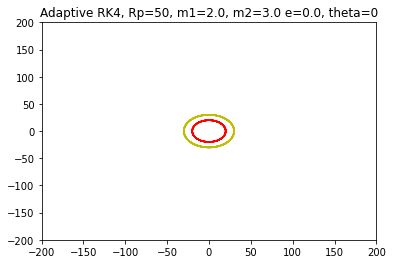

In [41]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
mtot=masses[0]+masses[1]
semimajor0=rad0*masses[1]/mtot
semimajor1=rad0*masses[0]/mtot
plt.title("Adaptive RK4, Rp="+str(rad0)+", m1="+str(masses[0])+", m2="+str(masses[1])+" e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor0,t,1),hyperbfns.getytheory(theta0,ecc0,semimajor0,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,semimajor1,t,-1),hyperbfns.getytheory(theta0,ecc0,semimajor1,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

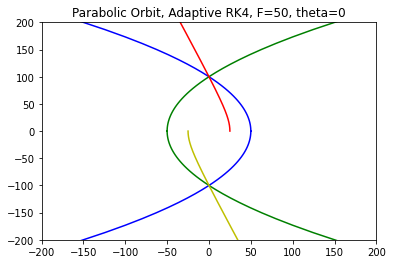

In [56]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,1),parabfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,-1),parabfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5